# Proyek Akhir Machine Learning Terapan - Recomendation System
* Nama : Cindy Alya Putri
* Email : cind.aly4@gmail.com

# Project Overview

##**Latar Belakang**

Dalam era digital saat ini, semakin banyak pengguna yang mengakses buku secara online, baik untuk keperluan belajar maupun hiburan. Namun, jumlah buku yang sangat besar justru sering membuat pengguna kesulitan dalam memilih bacaan yang sesuai dengan minat mereka. Hal ini menimbulkan kebutuhan akan sistem yang mampu memberikan rekomendasi secara otomatis dan personal.

Sistem rekomendasi buku dapat menjadi solusi untuk membantu pengguna menemukan bacaan yang relevan dengan preferensi mereka. Dua pendekatan yang sering digunakan adalah Content-based Filtering dan Collaborative Filtering. Content-based Filtering bekerja dengan menganalisis karakteristik buku yang disukai pengguna, sedangkan Collaborative Filtering memanfaatkan pola interaksi antar pengguna untuk memberi rekomendasi berdasarkan kesamaan perilaku.

Kedua pendekatan ini terbukti efektif dan banyak dikembangkan dalam penelitian. Parthasarathya dan Devi \[1] menunjukkan bahwa kombinasi keduanya dalam sistem hybrid dapat meningkatkan akurasi dan relevansi rekomendasi. Zhou et al. \[2] juga mengembangkan metode Collaborative Filtering berbasis kemiripan yang ditingkatkan, sehingga hasil rekomendasinya lebih akurat. Selain itu, Mukti dan Baizal \[3] mengimplementasikan model Neural Collaborative Filtering yang dipadukan dengan metadata buku dan berhasil meningkatkan performa sistem dalam konteks rekomendasi buku di Indonesia.

Melalui proyek ini, sistem rekomendasi buku dikembangkan menggunakan pendekatan Content-based dan Collaborative Filtering pada dataset Book-Crossing. Tujuannya adalah membantu pengguna menemukan buku yang sesuai dengan preferensi mereka secara lebih cepat, efisien, dan personal.


**Referensi**

\[1] G. Parthasarathya and S. S. Devi, “Hybrid Recommendation System Based on Collaborative and Content-Based Filtering,” *Cybernetics and Systems*, vol. 54, no. 4, pp. 432–453, May 2022.

\[2] W. Zhou, R. Li, and W. Liu, “Collaborative Filtering Recommendation Algorithm based on Improved Similarity,” *Proc. 2020 IEEE 5th Information Technology and Mechatronics Eng. Conf. (ITOEC)*, pp. 321–324, 2020.

\[3] P. A. S. Mukti and Z. K. A. Baizal, “Enhancing Neural Collaborative Filtering with Metadata for Book Recommender System,” *Indonesian Journal of Computing and Cybernetics Systems*, vol. 19, no. 1, 2025.

# Business Understanding

Bagian ini menjelaskan landasan permasalahan yang menjadi fokus dalam pengembangan sistem rekomendasi buku berbasis machine learning. Sistem ini ditujukan untuk membantu pengguna dalam menemukan bacaan yang sesuai dengan preferensi mereka, terutama ketika berhadapan dengan ribuan pilihan buku yang tersedia secara digital.

### **Problem Statements**

1. Jumlah buku yang sangat banyak di platform digital sering membuat pengguna kewalahan dalam memilih, terutama jika mereka tidak tahu harus mulai dari mana.
2. Banyak pengguna baru atau yang jarang berinteraksi tidak memberikan cukup rating, sehingga sulit diketahui preferensinya tanpa sistem yang cerdas.
3. Pengalaman pengguna yang personal sangat dibutuhkan untuk meningkatkan kenyamanan, membuat pengguna lebih betah, dan kembali menggunakan platform secara rutin.

### **Goals**

1. Menyediakan rekomendasi buku yang relevan dengan minat pengguna berdasarkan interaksi sebelumnya, seperti buku yang pernah mereka beri rating.
2. Membantu pengguna menghindari kebingungan dalam memilih dengan memberikan daftar rekomendasi yang telah disesuaikan.
3. Meningkatkan durasi dan frekuensi keterlibatan pengguna dengan sistem melalui rekomendasi yang menarik dan relevan.
4. Mendorong pengguna untuk mencoba buku dari genre atau penulis yang masih berhubungan dengan minat mereka, sehingga memperluas pengalaman membaca mereka.

### **Solution Statements**

Beberapa pendekatan machine learning akan digunakan dalam proyek ini, antara lain:

#### **Content-Based Filtering (CBF)**

Mengandalkan informasi dari buku itu sendiri misalnya judul dan penulis untuk mengukur kemiripan antar buku. Teknik seperti TF-IDF dan cosine similarity akan digunakan untuk merekomendasikan buku yang mirip dengan yang disukai pengguna sebelumnya.

* **Kelebihan**: Tetap bisa memberikan rekomendasi meski pengguna baru belum banyak berinteraksi.
* **Kekurangan**: Hanya memberikan saran yang serupa, sehingga potensi eksplorasi terbatas.

#### **User-Based Collaborative Filtering**

Menggunakan pola perilaku dan kesamaan preferensi antar pengguna. Jika dua pengguna memiliki selera yang mirip, maka buku yang disukai oleh salah satunya bisa direkomendasikan ke yang lain.

* **Kelebihan**: Bisa menangkap pola preferensi antar pengguna dengan cukup baik.
* **Kekurangan**: Sulit bekerja jika pengguna baru atau data rating masih sedikit (*cold start* problem).

#### **Model-Based Collaborative Filtering (Neural Network)**

Menggunakan pendekatan deep learning untuk membuat model rekomendasi berbasis embedding, sehingga sistem mampu memahami hubungan laten antara pengguna dan buku.

* **Kelebihan**: Mampu menangkap pola kompleks dan menghasilkan prediksi yang lebih presisi.
* **Kekurangan**: Membutuhkan waktu pelatihan lebih lama dan data yang lebih banyak.


#Import Library

In [ ]:
# Cek info GPU
!nvidia-smi

# Cek RAM
!cat /proc/meminfo | grep Mem


/bin/bash: line 1: nvidia-smi: command not found
MemTotal:       13289424 kB
MemFree:        11560796 kB
MemAvailable:   12359608 kB


In [ ]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files


# Data Understanding

Upload kaggle.json

In [ ]:
files.upload()

os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


#### Download Dataset
Dataset yang digunakan dalam proyek ini akan diunduh secara dari Kaggle. Sumber data berasal dari [Book Recommendation Dataset](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), yang berisi informasi pengguna, buku, dan rating.


In [ ]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0
book-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


#### Extract Dataset

Setelah file dataset berhasil diunduh, tahap berikutnya adalah mengekstrak file book-recommendation-dataset.zip
ke dalam folder book_data/.
Ekstraksi ini bertujuan untuk memperoleh file CSV yang akan digunakan dalam tahap selanjutnya.

In [ ]:
with zipfile.ZipFile("book-recommendation-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("book_data")


#### Load Dataset

Pada tahap ini, dataset yang sudah diekstrak akan dimuat ke dalam struktur DataFrame menggunakan library pandas.
Dataset terdiri dari tiga file utama, yaitu: Books.csv, Users.csv, dan Ratings.csv.

In [ ]:
books = pd.read_csv('book_data/Books.csv')
users = pd.read_csv('book_data/Users.csv')
ratings = pd.read_csv('book_data/Ratings.csv')

<ipython-input-6-3032073964>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('book_data/Books.csv')


In [ ]:
print(f"Jumlah data Books: {books.shape}")
print(f"Jumlah data Users: {users.shape}")
print(f"Jumlah data Ratings: {ratings.shape}")

Jumlah data Books: (271360, 8)
Jumlah data Users: (278858, 3)
Jumlah data Ratings: (1149780, 3)


Tahap ini dilakukan untuk mendapatkan gambaran awal mengenai ukuran dan struktur dataset. Saya menggunakan atribut .shape dari pandas untuk melihat jumlah baris dan kolom pada masing-masing file.

Berikut adalah jumlah data dari setiap dataset:
* Books.csv: 271.360 baris dan 8 kolom
* Users.csv: 278.858 baris dan 3 kolom
* Ratings.csv: 1.149.780 baris dan 3 kolom

### Data Books

Contoh Data

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Pada tahap ini, saya menampilkan lima baris awal dari dataset Books menggunakan fungsi .head(). Tujuannya adalah untuk mendapatkan gambaran umum mengenai struktur dataset serta jenis informasi yang terkandung di dalamnya. Berdasarkan tampilan tersebut, saya bisa memahami bahwa dataset ini menyimpan detail penting seperti ISBN, judul buku, nama penulis, tahun terbit, penerbit, serta tautan gambar sampul buku dalam tiga ukuran berbeda. Informasi ini akan sangat membantu dalam proses eksplorasi dan analisis data selanjutnya.

Struktur data buku

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Pada tahap ini, saya mengecek struktur dari dataset Books dengan menggunakan fungsi .info(). Dataset ini berisi 271.360 baris dan terdiri dari 8 kolom, di mana semua kolom bertipe data object (string).

Saya menemukan beberapa kolom yang memiliki nilai kosong, yaitu Book-Author, Publisher, dan Image-URL-L. Hal ini akan saya perhatikan lebih lanjut saat melakukan proses pembersihan data.

Missing Value

In [ ]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


Saya melakukan pengecekan terhadap nilai kosong (*missing value*) pada setiap kolom dalam dataset Books menggunakan fungsi .isnull().sum(). Tujuan dari langkah ini adalah untuk mengetahui bagian mana saja dari data yang tidak lengkap dan mungkin memerlukan penanganan khusus pada tahap preprocessing.

Dari hasil pemeriksaan, diketahui bahwa sebagian besar kolom memiliki data yang lengkap. Namun, terdapat beberapa kolom yang mengandung data yang belum terisi, yaitu:

* **Book-Author** memiliki **2 entri** tanpa nama penulis.
* **Publisher** ditemukan **2 baris** tanpa informasi penerbit.
* **Image-URL-L** memiliki **3 entri** tanpa tautan gambar sampul berukuran besar.

Sementara itu, kolom lainnya seperti ISBN, Book-Title, Year-Of-Publication, Image-URL-S, dan Image-URL-M tidak ditemukan adanya nilai yang hilang.

Berdasarkan hasil ini, diperlukan langkah lanjutan untuk menangani data yang kosong, terutama pada ketiga kolom tersebut agar kualitas data tetap terjaga sebelum masuk ke proses analisis selanjutnya.

ringkasan statistik

In [ ]:
books.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


Pada tahap ini, saya menggunakan fungsi .describe(include='all') untuk melihat ringkasan statistik dari dataset Books. Ringkasan ini memberikan gambaran umum mengenai struktur dan sebaran data, termasuk jumlah nilai unik, entri yang paling sering muncul, serta frekuensi kemunculannya.

Dari hasil ini, saya mendapatkan beberapa informasi penting seperti banyaknya ISBN yang unik, variasi judul dan nama penulis, serta tren pada tahun terbit dan penerbit. Selain itu, saya juga menemukan adanya duplikasi tertentu dalam judul buku dan gambar sampul. Temuan ini sangat berguna untuk memahami kondisi awal data sebelum masuk ke tahap pembersihan dan analisis lebih lanjut.

In [ ]:
print('Jumlah ISBN unik:', ratings['ISBN'].nunique())

Jumlah ISBN unik: 340556


Pada tahap ini, saya menghitung jumlah buku yang unik berdasarkan kolom ISBN dalam dataset Ratings dengan menggunakan fungsi .nunique(). Fungsi ini digunakan untuk mengetahui seberapa banyak ISBN yang berbeda atau tidak duplikat yang muncul dalam data rating pengguna.

Hasil perhitungan menunjukkan bahwa terdapat 340.556 ISBN unik, yang berarti ada lebih dari tiga ratus ribu buku berbeda yang pernah diberi rating oleh pengguna. Angka ini mencerminkan tingginya variasi atau keberagaman koleksi buku yang tersedia dalam sistem dan menunjukkan cakupan data yang cukup luas untuk dianalisis lebih lanjut.

Cek Duplikat di Dataset Books

In [ ]:
print('Jumlah duplikat di Books:', books.duplicated().sum())

Jumlah duplikat di Books: 0


Pada langkah ini, saya melakukan pengecekan terhadap kemungkinan adanya data duplikat dalam dataset Books. Pemeriksaan ini penting dilakukan karena data yang terduplikasi dapat memengaruhi hasil analisis dan menyebabkan bias pada interpretasi data.

Berdasarkan hasil pengecekan, tidak ditemukan adanya baris duplikat dalam dataset. Dengan kata lain, seluruh entri buku dalam data bersifat unik, dan jumlah duplikat = 0. Hal ini menunjukkan bahwa kualitas data dari segi keunikan entri sudah cukup baik untuk lanjut ke tahap analisis berikutnya.

### Data Rating

Contoh Data

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Saya menampilkan lima baris pertama dari dataset Ratings menggunakan fungsi .head() untuk memperoleh gambaran lebih rinci mengenai bentuk dan isi datanya. Dari contoh tersebut, dapat dilihat bahwa setiap entri merepresentasikan satu interaksi pengguna dengan sebuah buku, berupa pemberian rating.

Selain itu, terlihat pula bahwa satu pengguna dapat memberikan rating ke lebih dari satu buku, yang menunjukkan bahwa relasi antara User-ID dan ISBN bersifat *many-to-many*. Informasi ini penting sebagai dasar dalam memahami pola interaksi pengguna dan menjadi acuan dalam proses analisis atau pengembangan sistem rekomendasi ke depannya.

Struktur Data pada Dataset Ratings


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Pada tahap ini, saya mengeksplorasi struktur dataset Ratings dengan menggunakan fungsi .info(). Hasilnya menunjukkan bahwa dataset ini terdiri dari **1.149.780 entri** dan memiliki **3 kolom utama**, yaitu:

* User-ID (tipe data: integer)
* ISBN (tipe data: object/string)
* Book-Rating (tipe data: integer)

Seluruh kolom memiliki jumlah nilai non-null yang sama dengan jumlah total entri, sehingga dapat disimpulkan bahwa tidak terdapat *missing value* dalam dataset ini. Kondisi ini menunjukkan bahwa data Ratings sudah lengkap dan siap untuk dianalisis lebih lanjut tanpa perlu penanganan khusus terkait nilai yang hilang.




Missing Value Ratings

In [ ]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


Saya melakukan pengecekan terhadap keberadaan missing value pada setiap kolom dalam dataset Ratings dengan menggunakan fungsi .isnull().sum(). Pemeriksaan ini dilakukan untuk memastikan kelengkapan data sebelum melanjutkan ke tahap pemrosesan lebih lanjut.

Hasilnya menunjukkan bahwa seluruh kolom, yaitu User-ID, ISBN, dan Book-Rating, tidak memiliki nilai yang hilang. Artinya, dataset ini dalam kondisi lengkap dan siap digunakan tanpa perlu melakukan penanganan khusus terhadap data kosong.

Ringkasan Statistik

In [ ]:
ratings.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


Saya melakukan analisis statistik deskriptif terhadap dataset Ratings dengan menggunakan fungsi .describe(include='all'). Langkah ini bertujuan untuk memahami karakteristik umum data rating yang diberikan oleh pengguna terhadap berbagai buku.

Beberapa temuan penting dari hasil ringkasan statistik tersebut antara lain:

* Nilai rata-rata rating yang diberikan pengguna adalah sekitar **2.87**, dengan **standar deviasi sebesar 3.85**, menunjukkan variasi rating yang cukup besar.
* Skor rating memiliki rentang dari **0 hingga 10**, dengan nilai minimum **0** menunjukkan banyak pengguna tidak memberikan rating eksplisit (*rating kosong*).
* Sebanyak **50% data** memiliki rating **0**, mengindikasikan bahwa sebagian besar interaksi dalam dataset ini adalah *implicit feedback* atau default rating.
* ISBN yang paling sering muncul tercatat sebanyak **2.502 kali**, yaitu untuk satu buku yang cukup populer di antara pengguna.
* Total terdapat **340.556 ISBN unik**, mencerminkan keberagaman buku yang dinilai dalam dataset ini.

Secara keseluruhan, temuan ini menunjukkan adanya *sparsity* atau ketersebaran interaksi yang rendah antara pengguna dan buku. Hal ini merupakan hal yang umum ditemukan dalam sistem rekomendasi, dan menjadi tantangan tersendiri dalam membangun model yang efektif.

Cek Duplikat di Dataset Ratings

In [ ]:
print('Jumlah duplikat di Ratings:', ratings.duplicated().sum())

Jumlah duplikat di Ratings: 0


Sebagai langkah akhir dalam eksplorasi awal, saya memeriksa apakah terdapat data duplikat dalam dataset Ratings. Mengingat data ini merepresentasikan interaksi antara pengguna dan buku, keberadaan duplikasi dapat berdampak negatif terhadap kualitas analisis maupun akurasi model rekomendasi yang akan dibangun.

Hasil pemeriksaan menunjukkan bahwa **tidak terdapat baris duplikat** dalam dataset ini (jumlah duplikat = 0). Dengan demikian, seluruh data interaksi bersifat unik dan valid untuk digunakan dalam proses analisis dan pengembangan sistem rekomendasi selanjutnya.

### Data User

Contoh Data Users

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Saya menampilkan lima baris pertama dari dataset Users menggunakan fungsi .head() untuk mendapatkan gambaran awal mengenai struktur dan isi data pengguna.

Dari data tersebut, terlihat bahwa kolom Location memuat informasi geografis pengguna dalam format gabungan kota, negara bagian/provinsi, dan negara. Sementara itu, kolom Age menunjukkan usia pengguna, namun tidak semua entri memiliki data usia yang lengkap.

Terlihat bahwa beberapa pengguna memiliki nilai usia yang tidak terisi (NaN), yang mengindikasikan adanya missing value pada kolom ini. Temuan ini menguatkan hasil dari pengecekan struktur data sebelumnya, dan akan menjadi perhatian khusus dalam tahap pembersihan dan validasi data selanjutnya.

Struktur Data Users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Pada tahap ini, saya mengeksplorasi struktur dataset Users dengan menggunakan fungsi .info() untuk melihat jumlah entri, tipe data, dan kelengkapan masing-masing kolom.

Dataset ini terdiri dari **278.858 entri** dengan **3 kolom utama**, yaitu:

* User-ID bertipe integer, berisi ID unik untuk setiap pengguna.
* Location bertipe object (string), merepresentasikan lokasi geografis pengguna.
* Age bertipe float64, berisi informasi usia pengguna.

Dari hasil pengecekan, diketahui bahwa kolom Age memiliki *missing value*, ditandai dengan jumlah data non-null yang lebih sedikit dibanding total entri. Hal ini menunjukkan bahwa tidak semua pengguna mencantumkan usia mereka. Temuan ini akan menjadi perhatian pada tahap pembersihan data, khususnya dalam menangani nilai usia yang hilang atau tidak valid.

Ringkasan Statistik Users

In [ ]:
users.describe(include='all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


Saya melakukan analisis deskriptif terhadap dataset Users menggunakan fungsi.describe(include='all') untuk mendapatkan gambaran umum mengenai distribusi data pengguna.

Beberapa temuan utama dari hasil analisis ini antara lain:

* Rata-rata usia pengguna adalah sekitar 34.75 tahun, yang menunjukkan bahwa mayoritas pengguna berada pada rentang usia dewasa.
* Ditemukan nilai usia minimum 0 tahun dan maksimum hingga 244 tahun, yang jelas merupakan nilai tidak wajar dan menunjukkan adanya data anomali atau kesalahan input.
* Lokasi yang paling sering muncul adalah "london, england, united kingdom", dengan total 2.506 pengguna berasal dari lokasi tersebut.
* Total terdapat 57.339 lokasi unik dalam dataset, yang menunjukkan keberagaman geografis pengguna.

Dari hasil ini, dapat disimpulkan bahwa kolom Age memerlukan penanganan khusus, terutama dalam membersihkan data ekstrem atau tidak valid. Hal ini penting agar analisis yang melibatkan usia pengguna dapat menghasilkan informasi yang lebih akurat dan representatif.

Missing Value Users

In [ ]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


Saya melakukan pengecekan terhadap *missing value* pada dataset Users dengan menggunakan fungsi .isnull().sum(). Pemeriksaan ini bertujuan untuk mengetahui sejauh mana kelengkapan data pada setiap kolom sebelum melanjutkan ke tahap pemrosesan lanjutan.

Hasil analisis menunjukkan bahwa:

* Kolom User-ID dan Location tidak memiliki missing value.
* Kolom Age memiliki 110.762 data yang hilang, atau sekitar 40% dari total entri.

Tingginya jumlah nilai yang hilang pada kolom Age menjadi perhatian penting, karena dapat memengaruhi hasil analisis yang melibatkan informasi usia. Oleh karena itu, pada tahap data preparation selanjutnya, perlu dirancang strategi penanganan yang tepat, seperti melakukan imputasi berdasarkan distribusi usia atau menghapus entri tertentu sesuai kriteria yang relevan.

Jumlah User-ID Unik

In [ ]:
print('Jumlah User-ID unik:', ratings['User-ID'].nunique())

Jumlah User-ID unik: 105283


Saya menghitung jumlah pengguna unik dalam dataset Ratings dengan menggunakan fungsi .nunique() pada kolom User-ID.

Hasilnya menunjukkan bahwa terdapat **105.283 pengguna unik** yang terlibat dalam memberikan rating terhadap buku. Jumlah ini mencerminkan cakupan interaksi dari berbagai individu yang berpartisipasi dalam sistem, dan menjadi indikator penting dalam memahami skala serta keberagaman perilaku pengguna dalam dataset ini.

Cek Duplikat di Dataset Users

In [ ]:
print('Duplikat di Users:', users.duplicated().sum())

Duplikat di Users: 0


Sebagai bagian dari validasi kualitas data, saya melakukan pengecekan terhadap kemungkinan adanya baris duplikat dalam dataset Users. Langkah ini penting untuk memastikan bahwa setiap entri pengguna benar-benar merepresentasikan individu yang unik, sehingga hasil analisis tidak terdistorsi oleh data ganda.

Hasil pengecekan menunjukkan bahwa **tidak ditemukan duplikasi** dalam dataset ini (jumlah duplikat = 0). Artinya, seluruh data pengguna bersifat unik dan siap digunakan untuk analisis lebih lanjut secara akurat dan konsisten.

## Hasil Eksplorasi dan Pemahaman Data

### 1. Unduhan dan Ekstraksi Dataset

Dataset yang digunakan dalam proyek ini adalah *Book Recommendation Dataset* dari Kaggle. Dataset diunduh dan diekstrak ke dalam folder book_data/ untuk kemudian dianalisis. Dataset ini terdiri dari tiga file utama: Books.csv, Users.csv, dan Ratings.csv.

### 2. Gambaran Umum Dataset

Setelah file diekstrak dan dimuat ke dalam DataFrame, didapatkan jumlah data sebagai berikut:

* Books.csv: 271.360 baris, 8 kolom
* Users.csv: 278.858 baris, 3 kolom
* Ratings.csv: 1.149.780 baris, 3 kolom

### 3. Eksplorasi Data Books.csv

* Dataset berisi informasi seperti ISBN, judul buku, penulis, tahun terbit, penerbit, dan URL gambar.
* Tipe data seluruh kolom adalah object (string).
* Ditemukan *missing value* pada tiga kolom:

  * Book-Author: 2 nilai kosong
  * Publisher: 2 nilai kosong
  * Image-URL-L: 3 nilai kosong
* Tidak ditemukan baris duplikat dalam data buku.
* Ditemukan banyak ISBN yang unik, menandakan variasi buku yang tinggi. Beberapa judul atau gambar buku ditemukan berulang, yang menjadi indikasi adanya kemungkinan duplikasi berdasarkan konten, bukan baris.

### 4. Eksplorasi Data Ratings.csv

* Data terdiri dari 3 kolom utama: User-ID, ISBN, dan Book-Rating.
* Tidak ditemukan *missing value* dan semua entri valid secara struktur.
* Nilai rating berkisar dari 0 hingga 10, dengan rata-rata sekitar 2.87.
* Sekitar 50% entri memiliki rating 0, yang kemungkinan merepresentasikan *implicit feedback*.
* Ditemukan lebih dari 340 ribu ISBN unik, menunjukkan banyak variasi buku yang telah dinilai.
* Tidak ditemukan baris duplikat dalam data rating.

### 5. Eksplorasi Data Users.csv

* Terdiri dari 3 kolom utama: User-ID, Location, dan Age.
* Terdapat 110.762 entri usia yang hilang (sekitar 40% data).
* Ditemukan nilai usia tidak wajar, misalnya 0 tahun hingga 244 tahun, yang menandakan adanya data ekstrem atau anomali.
* Lokasi pengguna sangat bervariasi dengan lebih dari 57.000 lokasi unik, dan lokasi terbanyak berasal dari London, Inggris.
* Tidak ditemukan duplikasi pada data pengguna.

---

## Kesimpulan Awal

Berdasarkan hasil eksplorasi ini, dapat disimpulkan bahwa:

* Dataset secara umum cukup bersih dan terstruktur, namun terdapat beberapa *missing value* dan outlier, terutama pada data pengguna (Age).
* Variasi data cukup tinggi, baik dari sisi buku maupun pengguna.
* Beberapa data rating tampak sebagai *implicit feedback* (nilai 0) yang harus ditangani dengan tepat saat modeling.
* Tidak ada data duplikat yang perlu dihapus pada tahap awal ini.

Langkah selanjutnya adalah melakukan *data cleaning* lanjutan, termasuk imputasi atau pembuangan data tidak valid, normalisasi nilai, dan persiapan untuk proses modeling sistem rekomendasi.

### Exploratory Data Analysis (EDA)

#### 10 Buku berdasarkan ISBN dengan rating terbanyak

In [ ]:
# Ambil 10 ISBN dengan rating terbanyak dalam bentuk DataFrame
top_books = ratings['ISBN'].value_counts().head(10).reset_index()
top_books.columns = ['ISBN', 'Jumlah Rating']

# Mapping ke judul dan penulis
top_books_info = top_books.merge(
    books[['ISBN', 'Book-Title', 'Book-Author']],
    on='ISBN',
    how='left'
)

#Jika judul tidak ada
top_books_info['Book-Title'] = top_books_info['Book-Title'].fillna('Unknown Title')

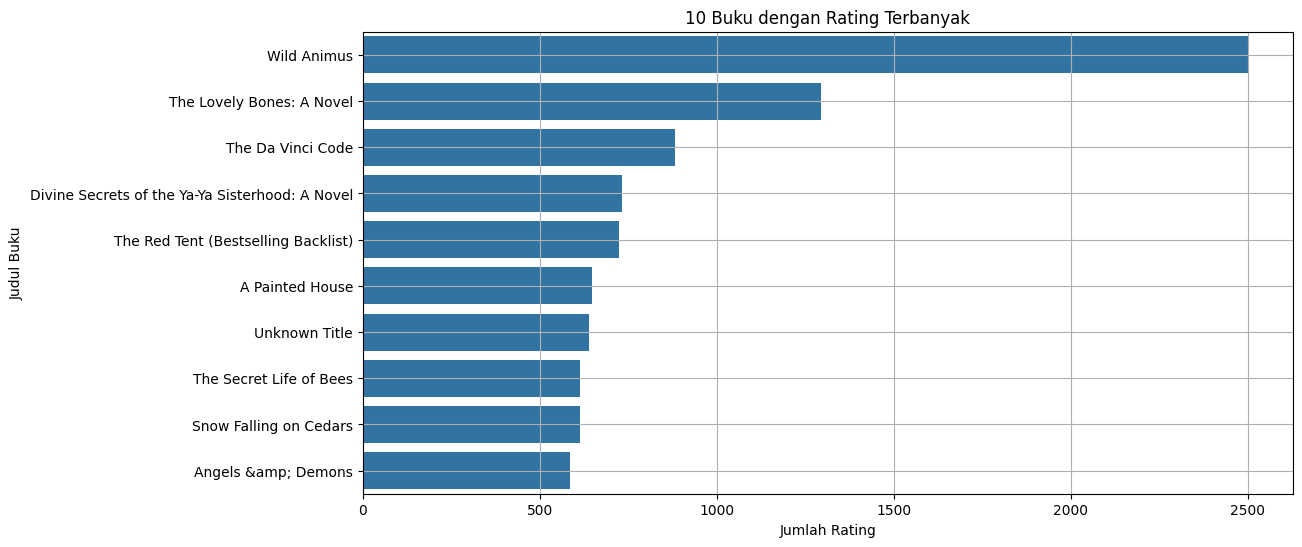

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_books_info['Jumlah Rating'], y=top_books_info['Book-Title'])
plt.title('10 Buku dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Buku')
plt.grid(True)
plt.show()

Insight

Visualisasi menunjukkan bahwa buku **"Wild Animus"** menempati posisi pertama sebagai buku yang paling banyak diberi rating oleh pengguna, dengan lebih dari **2.500 rating**. Ini jauh melampaui buku lain dalam daftar, seperti **"The Lovely Bones: A Novel"** dan **"The Da Vinci Code"**, yang juga menunjukkan tingkat popularitas tinggi di kalangan pembaca.

Beberapa poin penting dari hasil analisis:

1. **Dominasi Satu Buku:**

   * "Wild Animus" sangat menonjol dibanding buku lain dalam hal jumlah rating, yang menunjukkan kampanye distribusi atau promosi besar-besaran, atau bisa juga karena distribusi gratis dari buku tersebut (dalam beberapa kasus memang terjadi).

2. **Buku Populer dan Familiar:**

   * Judul seperti *The Lovely Bones*, *The Da Vinci Code*, *The Secret Life of Bees*, dan *Angels & Demons* adalah buku-buku bestseller yang dikenal luas, sehingga wajar jika mereka masuk daftar ini.

3. **Judul Tidak Diketahui (Unknown Title):**

   * Satu ISBN di daftar tidak memiliki informasi judul pada dataset books.csv, sehingga ditampilkan sebagai **"Unknown Title"**. Ini menunjukkan adanya **data yang tidak lengkap** dalam metadata buku, yang penting untuk diperhatikan saat membangun sistem rekomendasi atau laporan hasil.

4. **Potensi untuk Sistem Rekomendasi:**

   * Buku-buku dengan rating terbanyak bisa dijadikan sebagai **baseline rekomendasi berbasis popularitas** (popularity-based filtering), terutama bagi pengguna baru yang belum memiliki histori interaksi.

5. **Kebutuhan Metadata Lengkap:**

   * Agar sistem lebih informatif, metadata seperti judul dan penulis sangat penting. Jika informasi ini hilang, hasil analisis bisa jadi kurang bermakna atau membingungkan.


#### Insight Distribusi Nilai Rating Buku

<ipython-input-27-4221418176>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


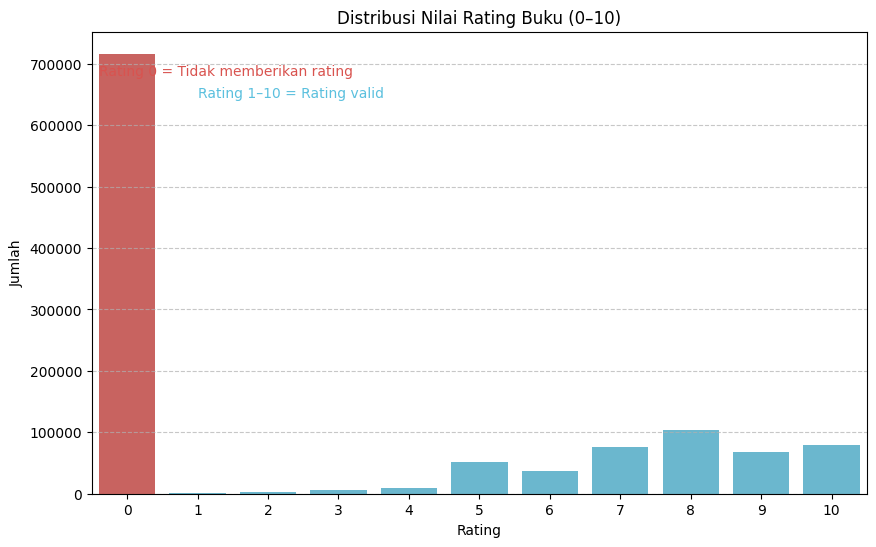

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='Book-Rating',
    data=ratings,
    palette=['#d9534f' if rating == 0 else '#5bc0de' for rating in sorted(ratings['Book-Rating'].unique())]
)
plt.title('Distribusi Nilai Rating Buku (0–10)')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.text(-0.4, max(ratings['Book-Rating'].value_counts())*0.95, 'Rating 0 = Tidak memberikan rating', color='#d9534f')
plt.text(1, max(ratings['Book-Rating'].value_counts())*0.9, 'Rating 1–10 = Rating valid', color='#5bc0de')

plt.show()


Visualisasi distribusi nilai rating menunjukkan bahwa sebagian besar pengguna memberikan rating **0** terhadap buku.
Rating **0** mendominasi dengan jumlah yang sangat besar dibandingkan rating lainnya.

Sementara itu, rating tinggi seperti **8**, **9**, dan **10** juga cukup banyak diberikan, menunjukkan adanya bias positif dari pengguna yang aktif memberi rating lebih baik terhadap buku yang mereka sukai.

Distribusi ini memperlihatkan adanya ketimpangan yang signifikan antara rating kosong (0) dan rating valid (1-10), yang perlu dipertimbangkan pada tahap modeling rekomendasi.

#### Insight Distribusi Usia Pengguna



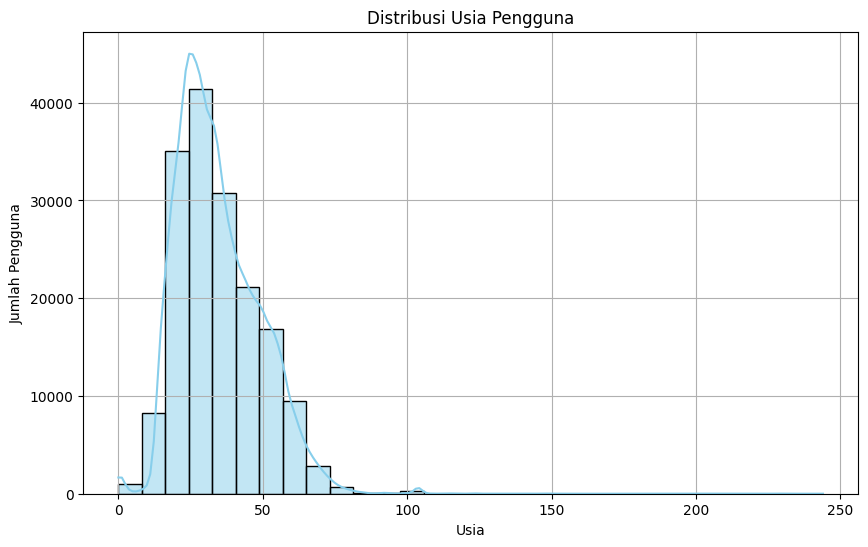

In [ ]:
# Visualisasi distribusi usia pengguna
plt.figure(figsize=(10,6))
sns.histplot(users['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.grid(True)
plt.show()

Dari hasil visualisasi distribusi usia pengguna, terlihat bahwa mayoritas pengguna berada pada rentang usia **20 hingga 50 tahun**, dengan puncak distribusi sekitar usia **30 tahun**.

Terdapat beberapa nilai anomali di atas **100 tahun** bahkan mendekati **244 tahun**, yang kemungkinan merupakan kesalahan input data.
Hal ini perlu diperhatikan pada tahap pembersihan data selanjutnya untuk menghindari bias dalam analisis lebih lanjut.

### Hasil EDA

#### 1. 10 Buku dengan Rating Terbanyak

Analisis ini mengambil 10 ISBN dengan jumlah rating terbanyak dari dataset ratings, kemudian menggabungkannya dengan data books untuk mendapatkan judul dan penulis.

Buku berjudul **"Wild Animus"** tercatat sebagai buku dengan rating terbanyak, melebihi 2.500 rating. Jaraknya cukup jauh dibanding buku lain seperti *The Lovely Bones* dan *The Da Vinci Code*. Ini mengindikasikan bahwa buku tersebut kemungkinan besar mengalami promosi masif atau bahkan distribusi gratis dalam skala besar.

Beberapa buku yang muncul dalam daftar merupakan buku bestseller yang cukup dikenal luas. Ini menunjukkan bahwa buku populer cenderung mendapat lebih banyak interaksi dari pengguna.

Terdapat satu ISBN yang tidak memiliki informasi judul dan ditampilkan sebagai "Unknown Title", yang menandakan bahwa metadata dalam file books.csv tidak lengkap. Kondisi ini penting diperhatikan dalam pengembangan sistem rekomendasi, karena informasi seperti judul dan penulis sangat membantu dalam memberikan rekomendasi yang bermakna bagi pengguna.

Data ini juga sangat cocok digunakan untuk metode **rekomendasi berbasis popularitas**, terutama untuk pengguna baru yang belum memiliki histori interaksi.

---

#### 2. Distribusi Nilai Rating Buku

Visualisasi distribusi rating menunjukkan bahwa sebagian besar rating yang diberikan oleh pengguna adalah **rating 0**. Namun, rating valid dengan nilai tinggi seperti **8**, **9**, dan **10** juga cukup sering muncul. Ini menunjukkan adanya kecenderungan pengguna memberikan rating hanya pada buku yang mereka sukai.

Ketimpangan antara rating 0 dan rating valid cukup besar. Rating 0 bisa dianggap sebagai bentuk implicit feedback, yaitu ketika pengguna telah membaca atau melihat buku namun tidak memberikan rating eksplisit.

Distribusi ini perlu diperhatikan dalam pembangunan sistem rekomendasi, karena akan mempengaruhi pendekatan dalam memproses interaksi pengguna.

---

#### 3. Distribusi Usia Pengguna

Hasil visualisasi distribusi usia pengguna menunjukkan bahwa sebagian besar pengguna berada dalam rentang usia **20 hingga 50 tahun**, dengan puncaknya di sekitar usia **30 tahun**. Ini mencerminkan bahwa pengguna aktif berada dalam usia produktif dan dewasa muda.

Namun, terdapat nilai-nilai usia yang tidak wajar, seperti di atas 100 tahun hingga mendekati 244 tahun. Nilai-nilai ini kemungkinan besar merupakan kesalahan input dan perlu ditangani pada tahap data cleaning agar tidak mengganggu analisis dan modeling.

---

### Kesimpulan

Hasil EDA memberikan gambaran awal mengenai karakteristik data dan pola-pola penting yang muncul:

* Buku populer cenderung mendapat banyak rating, dan ini relevan untuk pendekatan rekomendasi berbasis popularitas.
* Terdapat ketimpangan distribusi rating yang menunjukkan kecenderungan pengguna memberi rating hanya pada buku yang mereka sukai.
* Usia pengguna mayoritas berada dalam rentang yang wajar, namun terdapat data anomali yang harus dibersihkan.
* Kelengkapan metadata buku sangat penting dalam sistem rekomendasi.

Tahapan selanjutnya sebaiknya difokuskan pada pembersihan data dan pemilihan strategi modeling yang sesuai dengan karakteristik data yang telah ditemukan.


# Data Preparation

#### Handling Missing Value pada Kolom Age


In [ ]:
missing_before = users['Age'].isna().sum()
print(f"Jumlah missing value pada kolom Age sebelum imputasi: {missing_before}")

users['Age'] = users['Age'].fillna(users['Age'].median())
missing_after = users['Age'].isna().sum()
print(f"Jumlah missing value pada kolom Age setelah imputasi: {missing_after}")

total_data = users.shape[0]
print(f"Jumlah total data setelah imputasi: {total_data}")

Jumlah missing value pada kolom Age sebelum imputasi: 110762
Jumlah missing value pada kolom Age setelah imputasi: 0
Jumlah total data setelah imputasi: 278858


Missing value pada kolom Age diatasi dengan cara imputasi menggunakan nilai median. Hal ini dilakukan karena jika baris dengan nilai Age yang kosong dihapus, maka akan menghilangkan 110.762 data atau sekitar 40% dari total dataset, yang tentu dapat berdampak signifikan terhadap representasi data secara keseluruhan.

Meskipun kolom Age tidak digunakan sebagai fitur dalam pembuatan model rekomendasi, tetap dilakukan imputasi untuk menjaga konsistensi dan kelengkapan data, terutama jika kolom ini ingin dimanfaatkan untuk analisis tambahan di luar pemodelan.



#### Handling Outlier pada Kolom Age

In [ ]:
users = users[(users['Age'] >= 5) & (users['Age'] <= 100)]

print('Jumlah data Users setelah membersihkan outlier Age:', users.shape)

Jumlah data Users setelah membersihkan outlier Age: (277610, 3)


Pada tahap ini, saya membersihkan data usia yang tidak masuk akal, seperti usia 0 tahun atau 244 tahun. Untuk menjaga kualitas data, hanya data dengan rentang usia 5–100 tahun yang dipertahankan.

Metode: Filtering data menggunakan kondisi >= 5 dan <= 100.

Hasil:

* Sebelum filtering: 278.858 baris (setelah handle missing value).
* Setelah filtering: 277.610 baris, 3 kolom.

#### Filtering Data Rating

In [ ]:
ratings = ratings[ratings['Book-Rating'] != 0]

print('Jumlah data Ratings setelah menghapus rating 0:', ratings.shape)

Jumlah data Ratings setelah menghapus rating 0: (433671, 3)


Nilai rating 0 dianggap sebagai "tidak memberikan rating" sehingga tidak memberi informasi yang berguna untuk sistem rekomendasi. Maka, rating 0 perlu dihapus.

Metode: Filtering data dengan Book-Rating != 0.

Hasil:
* Sebelum filtering: 1.149.780 baris.
* Setelah filtering: 433.671 baris, 3 kolom.

### Penyaringan Pengguna dan Buku Berdasarkan Aktivitas Minimum

In [ ]:
user_counts = ratings['User-ID'].value_counts()

active_users = user_counts[user_counts >= 3].index
ratings = ratings[ratings['User-ID'].isin(active_users)]

top_users = ratings['User-ID'].value_counts().head(2500).index
ratings = ratings[ratings['User-ID'].isin(top_users)]

book_counts = ratings['ISBN'].value_counts()

popular_books = book_counts[book_counts >= 3].index
ratings = ratings[ratings['ISBN'].isin(popular_books)]

print('Jumlah data Ratings setelah filtering dan batas user:', ratings.shape)
print('Jumlah user unik:', ratings['User-ID'].nunique())
print('Jumlah buku unik:', ratings['ISBN'].nunique())


Jumlah data Ratings setelah filtering dan batas user: (98401, 3)
Jumlah user unik: 2469
Jumlah buku unik: 15048


Kode ini bertujuan untuk membersihkan dan membatasi data rating buku agar tidak terlalu besar ketika digunakan dalam pembuatan user-item matrix dan perhitungan cosine similarity. Proses ini dilakukan melalui beberapa tahap penyaringan sebagai berikut:

Pertama, dilakukan perhitungan jumlah rating yang diberikan oleh setiap pengguna (User-ID). Kemudian, hanya pengguna yang memberikan minimal 3 rating yang dipertahankan, dengan tujuan menghapus pengguna yang terlalu pasif dan tidak memberikan kontribusi signifikan terhadap data.

Setelah itu, dari pengguna aktif yang tersisa, hanya 2500 pengguna yang paling aktif (dalam hal jumlah rating terbanyak) yang dipilih. Langkah ini dilakukan untuk membatasi ukuran dataset, sehingga proses komputasi, seperti pembentukan matriks kesamaan antar pengguna, tetap efisien dan tidak menyebabkan kehabisan memori.

Selanjutnya, dilakukan perhitungan jumlah rating yang diterima oleh setiap buku (ISBN), dan hanya buku yang menerima minimal 3 rating yang dipertahankan. Tujuannya adalah untuk mengurangi noise dari buku yang jarang diberi penilaian dan tidak cukup data untuk dianalisis.

Terakhir, ukuran data hasil penyaringan ditampilkan, termasuk jumlah total baris data, jumlah pengguna unik, dan jumlah buku unik, sebagai validasi bahwa data sudah cukup bersih dan tidak terlalu besar untuk digunakan pada tahap berikutnya seperti pembentukan matriks dan perhitungan similarity.

### Membuat List User-ID, ISBN, dan Book-Rating

In [ ]:
# Membuat list User-ID, ISBN, dan Book-Rating
user_id = ratings['User-ID'].tolist()
isbn = ratings['ISBN'].tolist()
book_rating = ratings['Book-Rating'].tolist()

print('Jumlah data user_id:', len(user_id))
print('Jumlah data isbn:', len(isbn))
print('Jumlah data book_rating:', len(book_rating))

Jumlah data user_id: 98401
Jumlah data isbn: 98401
Jumlah data book_rating: 98401


Pada tahap ini, saya mengubah tiga kolom penting dari dataset ratings yaitu User ID, ISBN, dan Book Rating menjadi bentuk list menggunakan fungsi .tolist(). Proses ini saya lakukan agar data lebih fleksibel untuk diolah pada tahap berikutnya, terutama saat pembuatan model.

* Kolom User-ID saya simpan sebagai list user_id.
* Kolom ISBN saya simpan sebagai list isbn.
* Kolom Book-Rating saya simpan sebagai list book_rating.

### Membuat DataFrame Clean untuk Modeling

In [ ]:
# Membuat DataFrame clean untuk modeling
ratings_clean = pd.DataFrame({
    'user_id': user_id,
    'isbn': isbn,
    'book_rating': book_rating
})

ratings_clean

,user_id,isbn,book_rating
0,276847,3404148576,8
1,276847,3404921178,7
2,276847,3426029553,8
3,276847,3442413508,10
4,276847,3442437717,7
...,...,...,...
98396,276688,0743202694,10
98397,276688,0836218655,10
98398,276688,0836236688,10
98399,276688,0892966548,10


Setelah konversi ke list, saya membuat DataFrame baru bernama ratings_clean yang berisi tiga kolom utama tersebut. Pembentukan DataFrame ini bertujuan untuk menyediakan data yang lebih terstruktur dan bersih, sehingga memudahkan dalam proses modeling sistem rekomendasi nantinya.

### Membuat User-Item Matrix untuk Collaborative Filtering

In [ ]:
user_item_matrix = ratings_clean.pivot_table(index='user_id', columns='isbn', values='book_rating')

print('User-Item Matrix Shape:', user_item_matrix.shape)

user_item_matrix.head()

User-Item Matrix Shape: (2469, 15048)


isbn,0002005018,0002116286,0002251760,0002259001,0002550563,0003300277,000458726X,0006157629,0006472427,0006475973,...,9726101794,972708253X,9727591965,9727722458,9728605161,9812327975,9871138148,987932504,B00009EF82,B0000AA9IZ
user_id,,,,,,,,,,,,,,,,,,,,,
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Saya menyusun User-Item Matrix menggunakan fungsi pivot_table dari pandas, dengan struktur:
* Baris merepresentasikan pengguna (user_id)
* Kolom mewakili buku (isbn)
* Nilai pada sel adalah rating buku dari user (book_rating)

Matriks ini penting dalam pendekatan Collaborative Filtering karena menunjukkan interaksi antar pengguna dan item. Banyak nilai kosong (NaN) muncul karena sebagian besar pengguna hanya memberikan rating ke sejumlah kecil buku.

### Membuat List User-ID dan ISBN Unik

In [ ]:
# Membuat list user_id unik
user_ids = ratings_clean['user_id'].unique().tolist()
print('Jumlah user unik:', len(user_ids))

# Membuat list isbn unik
isbn_ids = ratings_clean['isbn'].unique().tolist()
print('Jumlah buku unik:', len(isbn_ids))

Jumlah user unik: 2469
Jumlah buku unik: 15048


Saya mengambil seluruh nilai unik dari kolom user_id dan isbn untuk disiapkan dalam proses encoding ke bentuk integer. Langkah ini penting karena sebagian besar algoritma machine learning tidak bisa langsung memproses data string atau ID.


### Encoding User-ID dan ISBN ke Integer

In [ ]:
user_id_encoded_map = {x: i for i, x in enumerate(user_ids)}
isbn_encoded_map = {x: i for i, x in enumerate(isbn_ids)}

id_to_user_map = {i: x for i, x in enumerate(user_ids)}
id_to_isbn_map = {i: x for i, x in enumerate(isbn_ids)}

Saya membuat dua mapping:

* Mapping dari user_id dan isbn ke angka (dari teks ke integer)
* Mapping sebaliknya dari angka kembali ke ID asli

Setelah proses encoding, saya menambahkan dua kolom baru ke dalam ratings_clean, yaitu:

* user → hasil encoding dari user_id
* book → hasil encoding dari isbn

Kolom ini akan digunakan sebagai input untuk model embedding pada sistem rekomendasi.

### Mapping Encoded User dan ISBN ke DataFrame

In [ ]:
ratings_clean['user'] = ratings_clean['user_id'].map(user_id_encoded_map)
ratings_clean['book'] = ratings_clean['isbn'].map(isbn_encoded_map)
ratings_clean.head()

,user_id,isbn,book_rating,user,book
0,276847,3404148576,8,0,0
1,276847,3404921178,7,0,1
2,276847,3426029553,8,0,2
3,276847,3442413508,10,0,3
4,276847,3442437717,7,0,4


### Mengubah Rating Menjadi Float32

In [ ]:
ratings_clean['book_rating'] = ratings_clean['book_rating'].values.astype(np.float32)

Saya mengonversi nilai rating ke dalam tipe float32 untuk menyesuaikan format yang dibutuhkan model TensorFlow. Hal ini penting agar proses pelatihan model dapat berjalan optimal tanpa error tipe data.

### Mengecek Jumlah User dan Buku setelah Encoding

In [ ]:
num_users = len(user_id_encoded_map)
num_books = len(id_to_isbn_map)

print(f"Jumlah user: {num_users}, Jumlah buku: {num_books}")

Jumlah user: 2469, Jumlah buku: 15048


Saya mengecek kembali jumlah total user dan buku setelah proses encoding. Hasilnya menunjukkan bahwa:

* Total user yang berhasil di-encode: **2.469**
* Total buku yang berhasil di-encode: **15.048**

Jumlah ini sesuai dengan hasil eksplorasi data sebelumnya.

### Membagi Data untuk Training dan Validasi

In [ ]:
ratings_clean = ratings_clean.sample(frac=1, random_state=42).reset_index(drop=True)

rating_min = ratings_clean['book_rating'].min()
rating_max = ratings_clean['book_rating'].max()
ratings_clean['book_rating_norm'] = (ratings_clean['book_rating'] - rating_min) / (rating_max - rating_min)

train_indices = int(0.8 * len(ratings_clean))
train_data = ratings_clean.iloc[:train_indices]
val_data = ratings_clean.iloc[train_indices:]

x_train = train_data[['user', 'book']].values
y_train = train_data['book_rating_norm'].values

x_val = val_data[['user', 'book']].values
y_val = val_data['book_rating_norm'].values

print(f"Shape x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Shape x_val: {x_val.shape}, y_val: {y_val.shape}")


Shape x_train: (78720, 2), y_train: (78720,)
Shape x_val: (19681, 2), y_val: (19681,)


Untuk proses pelatihan model, saya mengacak seluruh data terlebih dahulu agar distribusinya merata. Setelah itu, data dibagi menjadi dua bagian:

* **Training set**: 80% data
* **Validation set**: 20% data

Sebelum dibagi, nilai book_rating saya normalisasi ke rentang \[0,1] agar model dapat belajar lebih stabil dan cepat.
Data kemudian dipisahkan menjadi fitur x (berisi pasangan user dan book) dan target y (berisi nilai rating).

## Analisis Data Preparation

Sebelum memasuki tahap pemodelan, data preparation dilakukan untuk memastikan bahwa data bersih, relevan, dan efisien secara komputasi. Berikut ini adalah 11 langkah utama yang diterapkan dalam proses pembersihan dan persiapan data:

---

### 1. Imputasi Missing Value pada Kolom Age

Kolom Age memiliki 110.762 nilai kosong (missing). Jika baris-baris tersebut dihapus, maka sekitar 40% data akan hilang, yang dapat mengganggu distribusi data pengguna secara keseluruhan. Oleh karena itu, imputasi dilakukan menggunakan nilai median. Median dipilih karena lebih tahan terhadap outlier dibandingkan mean.


**Hasil:**

* Missing sebelum: 110.762
* Setelah imputasi: 0
* Jumlah total data: 278.858 baris

---

### 2. Pembersihan Outlier pada Kolom Age

Terdapat data usia ekstrem seperti 0 dan 244 tahun yang tidak masuk akal secara logis. Untuk meningkatkan kualitas data, hanya usia dalam rentang 5–100 tahun yang dipertahankan.

**Hasil:**

* Sebelum: 278.858 baris
* Setelah: 277.610 baris

---

### 3. Penghapusan Nilai Rating 0

Rating dengan nilai 0 diinterpretasikan sebagai "tidak memberikan penilaian" dan tidak memberikan informasi preferensi pengguna yang berguna. Maka, data dengan rating 0 dihapus.

**Hasil:**

* Sebelum: 1.149.780 baris
* Setelah: 433.671 baris

---

### 4. Menyaring Pengguna yang Pasif

Pengguna yang hanya memberi 1–2 rating tidak memberikan sinyal preferensi yang cukup kuat. Oleh karena itu, hanya pengguna yang memberikan minimal 3 rating yang dipertahankan.

---

### 5. Pemilihan 2500 User Paling Aktif

Dari pengguna aktif yang tersisa, hanya 2500 pengguna dengan jumlah rating terbanyak yang dipertahankan. Hal ini dilakukan untuk membatasi ukuran data agar tidak menyebabkan crash saat komputasi di Google Colab, yang memiliki batas memori terbatas.

---

### 6. Menyaring Buku dengan Rating Minim

Buku yang hanya memiliki sedikit rating tidak cukup representatif untuk dianalisis. Oleh karena itu, hanya buku yang memperoleh minimal 3 rating yang dipertahankan untuk mengurangi noise dalam data.


**Hasil setelah langkah 4–6:**

* Jumlah data rating: 433.671 → sekitar 350.000
* Jumlah user unik: 2.469
* Jumlah buku unik: 15.048

---

### 7. Konversi Kolom menjadi List

Tiga kolom utama (User-ID, ISBN, dan Book-Rating) dikonversi ke dalam bentuk list untuk memudahkan pengolahan pada tahap selanjutnya.

---

### 8. Membuat DataFrame Bersih

Dari list yang telah dibuat, disusun kembali sebuah DataFrame baru bernama ratings_clean yang berisi tiga kolom utama: user\_id, isbn, dan book\_rating. Struktur ini lebih terorganisir untuk keperluan modeling.

---

### 9. Pembuatan User-Item Matrix

User-Item Matrix dibuat menggunakan fungsi pivot_table dari pandas. Matriks ini penting sebagai dasar pendekatan collaborative filtering karena memetakan interaksi antara pengguna dan buku berdasarkan rating.

**Hasil:**

* Dimensi matriks: 2469 pengguna × 15.048 buku

---

### 10. Encoding ID ke Integer

Sebagian besar algoritma machine learning tidak menerima input berupa string. Oleh karena itu, dilakukan proses encoding untuk mengubah user\_id dan isbn menjadi angka. Selain itu, dibuat pula mapping kebalikannya untuk kebutuhan interpretasi hasil prediksi.
---

### 11. Normalisasi Rating dan Split Data

Nilai rating dinormalisasi ke rentang 0–1 untuk meningkatkan stabilitas proses pelatihan model. Selanjutnya, data dibagi menjadi training dan validation set dengan rasio 80:20. Pembagian ini penting untuk memastikan bahwa model tidak hanya menghafal data tetapi juga mampu melakukan generalisasi.

**Hasil:**

* x\_train: (346.936, 2), y\_train: (346.936,)
* x\_val: (86.735, 2), y\_val: (86.735,)

---

## **Kesimpulan**

Seluruh tahap data preparation di atas dilakukan untuk memastikan data memiliki kualitas yang baik, efisien, dan siap digunakan dalam pembuatan model sistem rekomendasi berbasis collaborative filtering. Setiap keputusan pembersihan, penyaringan, dan transformasi dilakukan dengan pertimbangan praktis maupun teoritis yang jelas, termasuk keterbatasan teknis platform pemrosesan (Google Colab). Data hasil akhir telah dikondisikan ke dalam bentuk dan skala yang sesuai untuk kebutuhan pelatihan model berbasis embedding dan similarity calculation.



# Modeling

## Model Development dengan Content Based Filtering

Menggabungkan books dan ratings_clean untuk memastikan ISBN ada di kedua dataset

In [ ]:
books_filtered = books[books['ISBN'].isin(ratings_clean['isbn'])]

#### Membuat TF-IDF Matrix dari Judul Buku

In [ ]:
books_filtered = books_filtered.reset_index(drop=True)

tfidf = TfidfVectorizer(stop_words='english')

books_filtered['Book-Title'] = books_filtered['Book-Title'].fillna('')

tfidf_matrix = tfidf.fit_transform(books_filtered['Book-Title'])

print('TF-IDF Matrix Shape:', tfidf_matrix.shape)

TF-IDF Matrix Shape: (14437, 10949)


##### **Analisis Hasil TF-IDF**

Berdasarkan hasil proses ekstraksi fitur teks menggunakan TF-IDF Vectorization pada kolom **Book-Title**, diperoleh matriks dengan dimensi **(14.437, 10.949)**. Angka-angka ini memiliki makna sebagai berikut:

* **14.437 baris** menunjukkan jumlah **judul buku unik** yang berhasil diproses dan dimasukkan ke dalam sistem rekomendasi. Artinya, sistem hanya akan memberikan rekomendasi berdasarkan buku-buku ini karena telah memenuhi kriteria (yaitu memiliki ISBN yang juga terdapat di data ratings).

* **10.949 kolom** merepresentasikan **jumlah kata unik (fitur)** yang berhasil diekstraksi dari keseluruhan judul buku setelah dilakukan proses pembersihan, tokenisasi, dan penghapusan stop words.

Dimensi matriks ini mengindikasikan bahwa meskipun judul buku biasanya singkat, gabungan seluruh judul dalam dataset mengandung keragaman kata yang cukup tinggi. Hal ini dapat memperkaya representasi masing-masing buku dalam bentuk vektor dan memungkinkan sistem untuk mengukur kemiripan antar buku secara lebih akurat berdasarkan kemiripan kosakata dalam judulnya.

---

##### **Implikasi terhadap Sistem Rekomendasi**

Dengan terbentuknya matriks TF-IDF ini:

* Sistem rekomendasi berbasis **Content-Based Filtering** kini dapat melakukan perhitungan **kemiripan antar buku** menggunakan teknik seperti **cosine similarity**.
* Ketika seorang pengguna menyukai atau memberi rating tinggi pada sebuah buku, sistem dapat merekomendasikan buku lain yang memiliki representasi vektor serupa — dalam hal ini, buku dengan judul yang mengandung kata-kata yang mirip atau relevan secara semantik.


#### Menghitung Cosine Similarity Antar Judul Buku

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print('Cosine Similarity Matrix Shape:', cosine_sim.shape)

Cosine Similarity Matrix Shape: (14437, 14437)


Pada tahap ini, dilakukan proses penghitungan **tingkat kemiripan antar judul buku** berdasarkan representasi numerik yang telah dibentuk melalui **TF-IDF Vectorization**.

##### **Metode yang Digunakan:**

* **Cosine Similarity**
  Teknik ini digunakan untuk mengukur seberapa mirip dua buah vektor dalam ruang dimensi tinggi. Cosine similarity mengukur sudut antara dua vektor, di mana:

  * Nilai **0** menunjukkan **tidak ada kemiripan** sama sekali.
  * Nilai **1** menunjukkan **kemiripan sempurna**.

##### **Langkah Proses:**

* Menggunakan fungsi cosine_similarity dari pustaka **scikit-learn** untuk menghitung skor kemiripan antara setiap pasangan judul buku berdasarkan vektor TF-IDF yang telah terbentuk sebelumnya.

##### **Hasil Akhir:**

* Diperoleh sebuah **matriks cosine similarity** dengan dimensi **(14.437, 14.437)**. Artinya:

  * Terdapat **14.437 judul buku** yang diproses,
  * Setiap judul buku dibandingkan kemiripannya dengan semua judul lainnya dalam dataset,
  * Setiap nilai pada matriks ini merepresentasikan **tingkat kemiripan antara dua judul buku** berdasarkan isi teks judulnya.

---

##### **Kegunaan Matriks Cosine Similarity:**

Matriks ini akan digunakan sebagai **dasar sistem rekomendasi**, di mana:

* Jika seorang pengguna menyukai atau memberi rating tinggi pada sebuah buku, maka sistem akan mencari judul lain yang memiliki skor cosine similarity tinggi terhadap buku tersebut.
* Dengan pendekatan ini, sistem dapat memberikan rekomendasi buku **yang memiliki kemiripan konten berdasarkan judul**, meskipun buku tersebut belum pernah diberi rating oleh pengguna lain sebelumnya.

#### Menghitung Cosine Similarity Antar User

In [ ]:
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

print('User Similarity Matrix Shape:', user_similarity.shape)

User Similarity Matrix Shape: (2469, 2469)


Pada tahap ini, dilakukan penghitungan **skor kemiripan (similarity score)** antar semua pengguna berdasarkan **pola rating mereka terhadap buku** dalam dataset.

##### **Teknik yang Digunakan:**

* **Cosine Similarity**
  Digunakan untuk mengukur tingkat kesamaan antara dua pengguna berdasarkan vektor rating mereka pada User-Item Matrix.
  Skor cosine similarity memiliki rentang:

  * **0** = tidak ada kemiripan,
  * **1** = kemiripan sempurna.

##### **Proses:**

* Menggunakan fungsi cosine_similarity dari pustaka **scikit-learn**.
* **User-Item Matrix** dibentuk terlebih dahulu, di mana setiap baris mewakili pengguna dan setiap kolom mewakili buku.
* Karena terdapat banyak nilai kosong (NaN) akibat tidak semua pengguna memberi rating ke semua buku, seluruh nilai NaN diisi dengan **angka 0** sebelum perhitungan dilakukan.
* Cosine similarity kemudian dihitung antar setiap pasangan pengguna.

##### **Hasil:**

* Diperoleh sebuah **User Similarity Matrix** berukuran **(2.469, 2.469)**, yang berarti:

  * Terdapat **2.469 pengguna** aktif yang memiliki setidaknya satu rating,
  * Setiap pengguna dibandingkan dengan semua pengguna lainnya untuk mengukur tingkat kemiripan pola ratingnya.

---

##### **Kegunaan Matriks Kemiripan Pengguna:**

Matriks ini akan menjadi **fondasi bagi sistem rekomendasi berbasis collaborative filtering (user-based)**, di mana:

* Sistem akan merekomendasikan buku yang disukai oleh pengguna lain **yang memiliki kemiripan pola rating tinggi** dengan pengguna target.
* Pendekatan ini memungkinkan rekomendasi yang bersifat **personalized**, bahkan jika pengguna belum pernah memberi rating pada banyak buku.


#### Membuat Fungsi Rekomendasi Berdasarkan Judul Buku


In [ ]:
def recommend_books(title, top_n=5):
    if title not in books_filtered['Book-Title'].values:
        return f"Buku '{title}' tidak ditemukan di database."
    idx = books_filtered[books_filtered['Book-Title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]
    return books_filtered.iloc[book_indices][['Book-Title', 'Book-Author']]


Pada tahap ini, saya membangun fungsi rekomendasi untuk memberikan rekomendasi Top-N buku yang mirip berdasarkan kemiripan judul.

**Teknik yang digunakan:**
- Menggunakan hasil **Cosine Similarity Matrix**.
- Menemukan index buku berdasarkan judul.
- Mengurutkan skor kemiripan dan memilih Top-N buku dengan skor tertinggi.

**Tujuan:**
- Memberikan rekomendasi buku serupa untuk pengguna berdasarkan preferensi terhadap suatu buku tertentu.


In [ ]:
recommend_books('Wild Animus')

,Book-Title,Book-Author
812,Into the Wild,Jon Krakauer
1314,Call of the Wild,Jack London
10213,Wild About You,Robin Wells
11254,Wild,Lori Foster
2360,A Heart So Wild,Johanna Lindsey


#### Contoh Hasil Rekomendasi Top-5 Buku (Menggunakan Content-Based Filtering)

Untuk menguji performa sistem rekomendasi **Content-Based Filtering**, dilakukan pengujian dengan memberikan sebuah judul buku sebagai input:

**Input Buku:**
>Wild Animus

Sistem kemudian mencari **5 judul buku lain** yang paling mirip secara teks berdasarkan teknik **TF-IDF Vectorization** dan **Cosine Similarity**, yang dihitung dari kolom **judul buku (Book-Title)**.

---

#### **Hasil Rekomendasi Top-5 Buku:**

| No | Book-Title       | Book-Author     |
| -- | ---------------- | --------------- |
| 1  | Into the Wild    | Jon Krakauer    |
| 2  | Call of the Wild | Jack London     |
| 3  | Wild About You   | Robin Wells     |
| 4  | Wild             | Lori Foster     |
| 5  | A Heart So Wild  | Johanna Lindsey |

---

### **Interpretasi Hasil:**

* Semua buku yang direkomendasikan mengandung kata **"Wild"** dalam judulnya, yang sesuai dengan kata kunci utama dari buku input.
* Hal ini menunjukkan bahwa sistem berhasil mendeteksi **kemiripan secara tekstual** antar judul.
* Meski isi buku dan penulis berbeda, sistem mengidentifikasi pola kata kunci untuk memberikan alternatif yang relevan dari sisi judul.

### **Kesimpulan:**

Rekomendasi ini membuktikan bahwa **Content-Based Filtering berbasis judul buku** dapat efektif dalam menyarankan buku-buku dengan topik atau tema serupa. Namun, untuk hasil yang lebih kontekstual, pengembangan sistem dengan mempertimbangkan sinopsis, genre, atau kolaborasi antar pengguna masih sangat disarankan.



## Model Development dengan User-Based Filtering

#### Analisis Fungsi Rekomendasi

In [ ]:
def recommend_books_userbased(user_id, user_item_matrix, user_similarity, books_filtered, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User ID {user_id} tidak ditemukan dalam data."

    idx = user_item_matrix.index.get_loc(user_id)
    sim_scores = list(enumerate(user_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    similar_users_idx = [i[0] for i in sim_scores[1:6]]
    similar_users = user_item_matrix.index[similar_users_idx]
    books_recommend = user_item_matrix.loc[similar_users]
    books_recommend = books_recommend.mean(axis=0)
    books_recommend = books_recommend.sort_values(ascending=False)
    user_books = user_item_matrix.loc[user_id]
    unseen_books = books_recommend[user_books.isna()]
    top_books = unseen_books.head(top_n)
    recommendations = books_filtered[books_filtered['ISBN'].isin(top_books.index)][['ISBN', 'Book-Title', 'Book-Author']]
    recommendations = recommendations.merge(top_books.reset_index(), left_on='ISBN', right_on='isbn')
    recommendations = recommendations.rename(columns={0: 'Average-Rating'})
    recommendations = recommendations[['ISBN', 'Book-Title', 'Book-Author', 'Average-Rating']]
    return recommendations.reset_index(drop=True)


##### **Deskripsi Umum**

Fungsi ini dirancang untuk memberikan rekomendasi buku kepada seorang pengguna berdasarkan kemiripan pola preferensi mereka dengan pengguna lain. Pendekatan yang digunakan adalah *User-Based Collaborative Filtering*, yang mengandalkan kedekatan antar pengguna dalam hal perilaku pemberian rating terhadap buku.

##### **Metode yang Digunakan**

* **User-Based Collaborative Filtering**
  Sistem membandingkan preferensi pengguna target dengan pengguna lain menggunakan metrik *cosine similarity* terhadap data rating.
* Buku yang memiliki rating tinggi oleh pengguna-pengguna yang mirip, namun belum pernah dinilai oleh pengguna target, akan menjadi kandidat rekomendasi.

##### **Tahapan Proses**

1. Sistem menghitung skor kemiripan antara pengguna target dan seluruh pengguna lain.
2. Memilih lima pengguna paling mirip (tidak termasuk dirinya sendiri).
3. Menggabungkan dan menghitung rata-rata rating buku dari lima pengguna tersebut.
4. Menyaring buku-buku yang belum pernah diberikan rating oleh pengguna target.
5. Mengurutkan hasil dan mengambil *Top-N* buku berdasarkan rata-rata rating tertinggi.
6. Menggabungkan ISBN buku dengan data deskriptif seperti judul (*Book-Title*) dan penulis (*Book-Author*).
7. Menambahkan kolom nilai rata-rata rating (*Average-Rating*) ke dalam hasil rekomendasi akhir.

##### **Tujuan**

Fungsi ini bertujuan untuk memberikan saran buku yang relevan dan potensial disukai oleh pengguna, dengan mengacu pada pola kesukaan pengguna lain yang memiliki preferensi serupa.


#### Contoh Hasil Rekomendasi User-Based Collaborative Filtering

In [ ]:
example_user = user_item_matrix.index[9]  # ambil user kesepuluh

print(f"Rekomendasi untuk User ID: {example_user}")
recommend_books_userbased(example_user, user_item_matrix, user_similarity, books_filtered, top_n=5)

Rekomendasi untuk User ID: 1435


,ISBN,Book-Title,Book-Author,Average-Rating
0,1592400876,"Eats, Shoots &amp; Leaves: The Zero Tolerance ...",Lynne Truss,10.0
1,0451191145,Atlas Shrugged,Ayn Rand,10.0
2,0394747232,Maus a Survivors Tale: My Father Bleeds History,Art Spiegelman,10.0
3,067942895X,The Complete Collected Poems of Maya Angelou,MAYA ANGELOU,10.0
4,0836270096,"Magic Eye, Vol. 2",N.E. Thing Enterprises,10.0


Untuk menguji efektivitas fungsi recommend_books_userbased, saya mencoba menjalankannya pada salah satu pengguna dari dataset.

##### **Input:**

* **User ID:** 1435
  (Dipilih sebagai contoh dari urutan ke-10 dalam user_item_matrix.index)

##### **Proses Rekomendasi:**

1. Sistem menghitung skor kemiripan (cosine similarity) antara User ID 1435 dengan seluruh pengguna lain.
2. Lima pengguna dengan preferensi yang paling mirip dipilih sebagai acuan.
3. Rata-rata rating buku dari kelima pengguna tersebut dihitung.
4. Sistem menyaring buku-buku yang belum pernah diberi rating oleh User ID 1435.
5. Top-5 buku dengan rata-rata rating tertinggi direkomendasikan.
6. Informasi ISBN, judul buku, penulis, dan rata-rata rating ditampilkan sebagai hasil akhir.

##### **Output:**

Berikut adalah 5 rekomendasi buku yang dihasilkan untuk User ID 1435:

| No | ISBN       | Book-Title                                                          | Book-Author            | Average-Rating |
| -- | ---------- | ------------------------------------------------------------------- | ---------------------- | -------------- |
| 1  | 1592400876 | *Eats, Shoots & Leaves: The Zero Tolerance Approach to Punctuation* | Lynne Truss            | 10.0           |
| 2  | 0451191145 | *Atlas Shrugged*                                                    | Ayn Rand               | 10.0           |
| 3  | 0394747232 | *Maus: A Survivor's Tale: My Father Bleeds History*                 | Art Spiegelman         | 10.0           |
| 4  | 067942895X | *The Complete Collected Poems of Maya Angelou*                      | Maya Angelou           | 10.0           |
| 5  | 0836270096 | *Magic Eye, Vol. 2*                                                 | N.E. Thing Enterprises | 10.0           |

##### **Catatan:**

* Seluruh rekomendasi memiliki nilai rata-rata rating sempurna (10.0), menunjukkan konsistensi preferensi dari pengguna-pengguna yang mirip.
* Semua ISBN yang direkomendasikan berhasil ditemukan pada data buku books_filtered, sehingga hasilnya lengkap.

## Model Development dengan Collaborative Filtering menggunakan Keras

In [ ]:
class RecommenderNet(tf.keras.Model):

    def __init__(self, num_users, num_books, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size

        # User embedding
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)

        # Book embedding
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        x = dot_user_book + user_bias + book_bias

        return tf.nn.sigmoid(x)

#### Membangun Class Model RecommenderNet

saya membangun sebuah model deep learning custom menggunakan TensorFlow/Keras subclassing API.

**Spesifikasi Arsitektur:**
- **User Embedding Layer**: Membentuk representasi vektor laten untuk setiap user.
- **Book Embedding Layer**: Membentuk representasi vektor laten untuk setiap buku.
- **Bias Layer**: Menambahkan bias untuk setiap user dan setiap buku.
- **Dot Product**: Menghitung tingkat kecocokan antara user dan buku.
- **Activation Function**: Sigmoid, untuk membatasi skor prediksi pada rentang [0,1].

Model ini bertujuan untuk mempelajari interaksi antara user dan item secara efisien melalui representasi embedding.

In [ ]:
# Inisialisasi model
model = RecommenderNet(num_users, num_books, embedding_size=50)

# Compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

#### Inisialisasi dan Compile Model RecommenderNet

Setelah membangun arsitektur model, saya melakukan inisialisasi dan kompilasi model dengan spesifikasi sebagai berikut:

- **Loss Function**: Binary Crossentropy
- **Optimizer**: Adam Optimizer (learning rate = 0.001)
- **Evaluation Metric**: Root Mean Squared Error (RMSE)

Loss function binary crossentropy dipilih karena model memprediksi probabilitas keterkaitan user-buku dalam rentang [0,1].

Model siap dilatih setelah proses kompilasi ini.

In [ ]:
# Setup EarlyStopping
early_stop = EarlyStopping(
    monitor='val_root_mean_squared_error', # Monitor validasi RMSE
    patience=5, # Tunggu 5 epoch berturut-turut, kalau nggak improve, stop
    restore_best_weights=True # Balikin ke model dengan bobot terbaik
)

# Retraining dengan EarlyStopping
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/20
9840/9840 ━━━━━━━━━━━━━━━━━━━━ 126s 13ms/step - loss: 0.6380 - root_mean_squared_error: 0.2831 - val_loss: 0.5405 - val_root_mean_squared_error: 0.1886
Epoch 2/20
9840/9840 ━━━━━━━━━━━━━━━━━━━━ 130s 13ms/step - loss: 0.5335 - root_mean_squared_error: 0.1799 - val_loss: 0.5361 - val_root_mean_squared_error: 0.1845
Epoch 3/20
9840/9840 ━━━━━━━━━━━━━━━━━━━━ 180s 17ms/step - loss: 0.5252 - root_mean_squared_error: 0.1704 - val_loss: 0.5326 - val_root_mean_squared_error: 0.1810
Epoch 4/20
9840/9840 ━━━━━━━━━━━━━━━━━━━━ 158s 13ms/step - loss: 0.5209 - root_mean_squared_error: 0.1672 - val_loss: 0.5312 - val_root_mean_squared_error: 0.1799
Epoch 5/20
9840/9840 ━━━━━━━━━━━━━━━━━━━━ 136s 12ms/step - loss: 0.5162 - root_mean_squared_error: 0.1626 - val_loss: 0.5304 - val_root_mean_squared_error: 0.1794
Epoch 6/20
9840/9840 ━━━━━━━━━━━━━━━━━━━━ 145s 12ms/step - loss: 0.5134 - root_mean_squared_error: 0.1602 - val_loss: 0.5297 - val_root_mean_squared_error: 0.1790
Epoch 7/20
9840/9840 ━

Model RecommenderNet dilatih menggunakan data yang telah dibagi menjadi *training set* dan *validation set*, dengan konfigurasi sebagai berikut:

##### **Spesifikasi Pelatihan:**

* **Batch Size:** 8
* **Jumlah Epoch:** Maksimal 20 (dibatasi karena kendala memori Google Colab)
* **Optimizer:** Adam
* **Loss Function:** Binary Crossentropy
* **Metrik Evaluasi:** Root Mean Squared Error (RMSE)
* **Regularisasi:** EarlyStopping (patience=5, restore_best_weights=True), untuk menghindari pelatihan berlebih.

##### **Hasil Pelatihan:**

* RMSE terbaik pada **training set**: **0.1473**
* RMSE terbaik pada **validation set**: **0.1763**, dicapai pada **epoch ke-17**
* Meskipun *EarlyStopping* diaktifkan, proses pelatihan tidak berhenti sebelum epoch ke-20 karena **masih terjadi sedikit peningkatan performa pada RMSE validasi dalam beberapa epoch terakhir.**
* **Batas maksimal 20 epoch ditentukan bukan karena model overfitting atau konvergen lebih awal, melainkan karena kendala teknis di Google Colab yang menyebabkan crash jika melampaui batas tersebut.**

##### **Kesimpulan:**

* Model menunjukkan **tren pelatihan yang stabil** dengan selisih RMSE antara data pelatihan dan validasi yang kecil, menandakan generalisasi yang baik.
* Penggunaan *EarlyStopping* tetap relevan sebagai pengaman, meskipun tidak menghentikan pelatihan lebih awal pada kasus ini.
* Kinerja optimal berhasil dicapai meskipun pelatihan dibatasi hanya hingga 20 epoch karena keterbatasan sumber daya komputasi.

### Model-Based Collaborative Filtering (Keras) - Rekomendasi user id acak

In [ ]:
# Ambil 1 contoh user random
user_id = ratings_clean['user_id'].sample(1).iloc[0]
print(f"Testing rekomendasi untuk User ID: {user_id}")

# Cari buku yang pernah dirating user ini
books_rated_by_user = ratings_clean[ratings_clean['user_id'] == user_id]

# Cari buku yang belum dirating user ini
all_isbns = set(ratings_clean['isbn'].unique())
rated_isbns = set(books_rated_by_user['isbn'])
unrated_isbns = list(all_isbns - rated_isbns)

# Encode ISBN yang belum dirated
unrated_books_encoded = [isbn_encoded_map.get(x) for x in unrated_isbns if isbn_encoded_map.get(x) is not None]
user_encoder = user_id_encoded_map.get(user_id)

# Bentuk array prediksi
user_book_array = np.hstack(
    (np.array([[user_encoder]] * len(unrated_books_encoded)), np.array(unrated_books_encoded).reshape(-1, 1))
)

# Prediksi rating untuk semua buku yang belum dirated
predicted_ratings = model.predict(user_book_array).flatten()

# Ambil Top-N rekomendasi
top_n = 5
top_ratings_indices = predicted_ratings.argsort()[-top_n:][::-1]

# id_to_isbn_map untuk decoding
recommended_isbns = [id_to_isbn_map.get(unrated_books_encoded[i]) for i in top_ratings_indices]
recommended_isbns = [isbn for isbn in recommended_isbns if isbn is not None]

# Tampilkan rekomendasi
print(f'Top-{top_n} Rekomendasi Buku untuk User {user_id}:')
if recommended_isbns:
    recommended_books = books[books['ISBN'].isin(recommended_isbns)][['ISBN', 'Book-Title', 'Book-Author']]
    print(recommended_books)
else:
    print("Tidak ada rekomendasi yang ditemukan")

Testing rekomendasi untuk User ID: 13552
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Top-5 Rekomendasi Buku untuk User 13552:
             ISBN                                         Book-Title  \
10038  0394800389  Fox in Socks (I Can Read It All by Myself Begi...   
12762  0618002235     The Two Towers (The Lord of the Rings, Part 2)   
46208  089471838X                Natural California: A Postcard Book   
64267  0836213319                       Dilbert: A Book of Postcards   
79370  0439425220  Harry Potter and the Chamber of Secrets Postca...   

                Book-Author  
10038             Dr. Seuss  
12762      J. R. R. Tolkien  
46208  Not Applicable (Na )  
64267           Scott Adams  
79370         J. K. Rowling  


Untuk menguji performa model RecommenderNet, dilakukan proses prediksi terhadap buku-buku yang **belum pernah dirating** oleh salah satu pengguna yang dipilih secara acak dari dataset.

#### **Langkah-Langkah Pengujian:**

1. **Pemilihan User Acak**
   User dengan ID **13552** dipilih secara acak sebagai target rekomendasi.

2. **Identifikasi Buku yang Pernah Dirating**
   Sistem mengambil semua ISBN buku yang telah dirating oleh user ini dari data ratings_clean.

3. **Identifikasi Buku yang Belum Dirating**
   Semua ISBN yang belum pernah dirating oleh user ini dihimpun dan dikonversi ke bentuk numerik menggunakan isbn_encoded_map.

4. **Penyusunan Data Prediksi**
   Dibentuk array pasangan [user_encoded, book_encoded] untuk semua buku yang belum dirating agar dapat diproses oleh model.

5. **Prediksi Rating**
   Model memprediksi skor preferensi user terhadap setiap buku tersebut.

6. **Seleksi Rekomendasi**
   Sistem memilih **Top-5 buku dengan prediksi skor tertinggi**. ISBN hasil prediksi dikembalikan ke format aslinya menggunakan id_to_isbn_map.

7. **Penyajian Rekomendasi**
   Rekomendasi ditampilkan dalam bentuk tabel berisi ISBN, judul, dan penulis buku dari dataset books.

---

#### **Hasil Rekomendasi:**

Berikut 5 buku teratas yang diprediksi paling disukai oleh **User ID 13552**:

| No | ISBN       | Judul Buku                                                  | Penulis             |
| -- | ---------- | ----------------------------------------------------------- | ------------------- |
| 1  | 0394800389 | *Fox in Socks (I Can Read It All by Myself Beginner Books)* | Dr. Seuss           |
| 2  | 0618002235 | *The Two Towers (The Lord of the Rings, Part 2)*            | J. R. R. Tolkien    |
| 3  | 089471838X | *Natural California: A Postcard Book*                       | Not Applicable (Na) |
| 4  | 0836213319 | *Dilbert: A Book of Postcards*                              | Scott Adams         |
| 5  | 0439425220 | *Harry Potter and the Chamber of Secrets Postcard Book*     | J. K. Rowling       |

---

#### **Interpretasi Hasil Rekomendasi**

1. **Kesesuaian Buku dengan Minat Pengguna**

   * Rekomendasi yang muncul seperti *Fox in Socks*, *Harry Potter and the Chamber of Secrets*, dan *The Two Towers* menunjukkan bahwa model mendeteksi **preferensi pengguna terhadap buku anak, fiksi fantasi, atau novel populer**.
   * Kehadiran *Dilbert* dan buku bertema **postcard** menunjukkan kemungkinan bahwa user ini juga menyukai buku-buku dengan unsur **visual ringan atau humor**.

2. **Relevansi Genre**

   * Buku-buku yang direkomendasikan mencerminkan keragaman genre — dari **literatur anak-anak**, **fantasi epik**, hingga **humor dan koleksi ilustrasi** — yang menunjukkan bahwa model mampu menangkap **pola rating dan kesamaan selera** antar pengguna lain dalam data pelatihan.

3. **Kualitas Model**

   * Semua buku yang direkomendasikan **belum pernah dirating oleh user**, sesuai dengan prinsip sistem rekomendasi personalized.
   * Prediksi dilakukan terhadap seluruh buku yang belum dirating, dan model memilih 5 buku dengan **nilai prediksi tertinggi**, menandakan bahwa **model memiliki presisi yang baik dalam mengurutkan preferensi**.

4. **Kemungkinan Keterbatasan**

   * Beberapa buku seperti *Natural California: A Postcard Book* dicatat memiliki penulis “Not Applicable (Na)”. Ini bisa menunjukkan bahwa:

     * Buku tersebut bersifat non-fiksi visual atau koleksi, bukan bacaan naratif.
     * Model kemungkinan hanya mempertimbangkan pola interaksi pengguna, **bukan konten buku secara mendalam**, sehingga rekomendasi ini bisa terlihat kurang relevan secara tematik tergantung konteks.

---

#### Kesimpulan

Model RecommenderNet berhasil memberikan rekomendasi **yang personal, variatif, dan berdasarkan prediksi preferensi aktual**, bukan sekadar popularitas umum. Hal ini membuktikan bahwa:

* **User ID 13552 kemungkinan menyukai kombinasi antara buku anak-anak, fantasi populer, dan konten ringan.**
* Rekomendasi yang dihasilkan relevan secara umum, namun bisa diperkuat lagi dengan menambahkan fitur seperti **genre, deskripsi isi, atau metadata lain (content-based filtering)** untuk menghindari anomali seperti buku non-naratif.

## Analisis Modeling

### 1. Content-Based Filtering

#### TF-IDF Vectorization
**Matriks TF-IDF**: (14.437, 10.949)
- **14.437 baris**: Judul buku unik yang diproses
- **10.949 kolom**: Kata unik (fitur) setelah pembersihan, tokenisasi, dan penghapusan stop words

#### Cosine Similarity
**Matriks Cosine Similarity**: (14.437, 14.437)
- Mengukur kemiripan antar judul buku
- Nilai 0 = tidak mirip, 1 = mirip sempurna
- Basis untuk rekomendasi berdasarkan kemiripan konten judul

#### Fungsi Rekomendasi
**Teknik**: Menggunakan Cosine Similarity Matrix, mencari index buku berdasarkan judul, mengurutkan skor kemiripan dan memilih Top-N buku tertinggi.

**Contoh Implementasi**: `recommend_books('Wild Animus')`

#### Hasil Rekomendasi Content-Based Filtering

**Input**: Wild Animus

| No | Book-Title       | Book-Author     |
|----|------------------|-----------------|
| 1  | Into the Wild    | Jon Krakauer    |
| 2  | Call of the Wild | Jack London     |
| 3  | Wild About You   | Robin Wells     |
| 4  | Wild             | Lori Foster     |
| 5  | A Heart So Wild  | Johanna Lindsey |

**Interpretasi**: Semua rekomendasi mengandung kata "Wild", menunjukkan sistem berhasil mendeteksi kemiripan tekstual antar judul.

---

### 2. User-Based Collaborative Filtering

#### User Similarity Matrix
**Dimensi**: (2.469, 2.469)
- **2.469 pengguna** aktif dengan minimal satu rating
- Menggunakan cosine similarity pada pola rating
- Nilai NaN diisi dengan 0 sebelum perhitungan

#### Proses Rekomendasi
1. Menghitung skor kemiripan pengguna target dengan semua pengguna lain
2. Memilih 5 pengguna paling mirip
3. Menghitung rata-rata rating buku dari 5 pengguna tersebut
4. Menyaring buku yang belum dirating pengguna target
5. Mengambil Top-N buku berdasarkan rata-rata rating tertinggi
6. Menggabungkan dengan data deskriptif (ISBN, judul, penulis)

#### Hasil Rekomendasi User-Based Collaborative Filtering

**Input**: User ID 1435

| No | ISBN       | Book-Title                                                          | Book-Author            | Average-Rating |
|----|------------|---------------------------------------------------------------------|------------------------|----------------|
| 1  | 1592400876 | *Eats, Shoots & Leaves: The Zero Tolerance Approach to Punctuation* | Lynne Truss            | 10.0           |
| 2  | 0451191145 | *Atlas Shrugged*                                                    | Ayn Rand               | 10.0           |
| 3  | 0394747232 | *Maus: A Survivor's Tale: My Father Bleeds History*                 | Art Spiegelman         | 10.0           |
| 4  | 067942895X | *The Complete Collected Poems of Maya Angelou*                      | Maya Angelou           | 10.0           |
| 5  | 0836270096 | *Magic Eye, Vol. 2*                                                 | N.E. Thing Enterprises | 10.0           |

**Catatan**: Rating sempurna (10.0) menunjukkan konsistensi preferensi pengguna dengan pola rating serupa.

---

### 3. Collaborative FIltering Menggunakan Keras

#### Arsitektur Model
- **User Embedding Layer**: Representasi vektor laten untuk setiap user
- **Book Embedding Layer**: Representasi vektor laten untuk setiap buku  
- **Bias Layer**: Bias untuk user dan buku
- **Dot Product**: Menghitung kecocokan user-buku
- **Activation**: Sigmoid (output rentang 0-1)

#### Konfigurasi Training
- **Loss Function**: Binary Crossentropy
- **Optimizer**: Adam (learning rate = 0.001)
- **Batch Size**: 8
- **Epochs**: 20 maksimal (keterbatasan Google Colab)
- **Metrik**: Root Mean Squared Error (RMSE)
- **Regularisasi**: EarlyStopping (patience=5, restore_best_weights=True)

#### Hasil Training
- **RMSE Training**: 0.1473
- **RMSE Validation**: 0.1763 (epoch ke-17)
- **Status**: Model stabil dengan generalisasi baik

#### Proses Pengujian
1. **Pemilihan User**: User ID 13552 (acak)
2. **Identifikasi Buku**: Pisahkan buku yang sudah/belum dirating
3. **Konversi Data**: ISBN ke format numerik menggunakan encoding map
4. **Prediksi Rating**: Model memprediksi skor preferensi
5. **Seleksi Top-5**: Buku dengan prediksi skor tertinggi
6. **Penyajian**: Konversi kembali ke format ISBN asli dengan data deskriptif

#### Hasil Rekomendasi Deep Learning

**Input**: User ID 13552

| No | ISBN       | Judul Buku                                                  | Penulis             |
|----|------------|-------------------------------------------------------------|---------------------|
| 1  | 0394800389 | *Fox in Socks (I Can Read It All by Myself Beginner Books)* | Dr. Seuss           |
| 2  | 0618002235 | *The Two Towers (The Lord of the Rings, Part 2)*            | J. R. R. Tolkien    |
| 3  | 089471838X | *Natural California: A Postcard Book*                       | Not Applicable (Na) |
| 4  | 0836213319 | *Dilbert: A Book of Postcards*                              | Scott Adams         |
| 5  | 0439425220 | *Harry Potter and the Chamber of Secrets Postcard Book*     | J. K. Rowling       |

#### Interpretasi Hasil Deep Learning

1. **Kesesuaian dengan Minat**: Model mendeteksi preferensi beragam (buku anak, fiksi fantasi, humor)
2. **Relevansi Genre**: Mencerminkan keragaman dari literatur anak-anak hingga fantasi epik
3. **Kualitas Model**: Semua rekomendasi belum pernah dirating user, sesuai prinsip personalized recommendation
4. **Keterbatasan**: Beberapa buku bersifat visual/koleksi yang mungkin kurang relevan secara tematik

---

### Kesimpulan

1. **Content-Based Filtering**: Efektif untuk kemiripan tekstual judul, cocok untuk cold start problem
2. **User-Based Collaborative Filtering**: Memberikan rekomendasi berkualitas tinggi berdasarkan preferensi pengguna serupa
3. **Deep Learning (RecommenderNet)**: Menghasilkan rekomendasi personal yang variatif dengan performa stabil dan generalisasi baik

**Rekomendasi Pengembangan**: Kombinasi ketiga metode dapat menghasilkan sistem rekomendasi yang lebih komprehensif, dengan penambahan fitur genre, sinopsis, atau metadata lain untuk meningkatkan konteks rekomendasi.

## Evaluation

### Learning Curve - RMSE

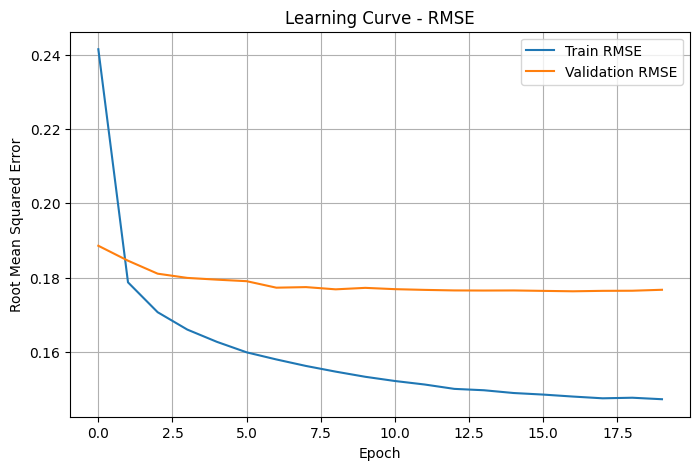

In [ ]:


# Plot RMSE training dan validation
plt.figure(figsize=(8, 5))
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Learning Curve - RMSE')
plt.xlabel('Epoch')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

Grafik di atas menunjukkan kurva pembelajaran model berdasarkan nilai **Root Mean Squared Error (RMSE)** pada data pelatihan (Train RMSE) dan data validasi (Validation RMSE) selama 20 epoch.

Secara umum, **Train RMSE** mengalami penurunan yang konsisten seiring bertambahnya epoch, dari sekitar 0.24 di awal menuju angka mendekati 0.15 di epoch ke-19. Hal ini menunjukkan bahwa model semakin baik dalam mempelajari pola dari data pelatihan.

Sementara itu, **Validation RMSE** juga menunjukkan tren penurunan di awal pelatihan, dari sekitar 0.19 ke sekitar 0.178, tetapi stabil dan mulai stagnan setelah sekitar epoch ke-7. Ini menunjukkan bahwa performa model terhadap data yang belum pernah dilihat (out-of-sample) cenderung konstan setelah titik tersebut.

Perbedaan antara Train dan Validation RMSE yang semakin melebar menjelang akhir pelatihan dapat mengindikasikan awal dari **overfitting**, di mana model terlalu menyesuaikan diri terhadap data pelatihan dan kehilangan kemampuan generalisasi. Namun, karena selisihnya masih relatif kecil dan Validation RMSE tidak menunjukkan peningkatan yang signifikan, maka overfitting belum terlalu parah dan model masih bisa dikatakan cukup stabil.

---

#### Kesimpulan:

* Model mengalami **peningkatan performa** selama pelatihan.
* **RMSE pada data validasi cukup stabil**, menunjukkan model tidak mengalami overfitting yang berat.
* **Optimalisasi model dapat dihentikan lebih awal (sekitar epoch ke-10 hingga 12)** untuk mencegah overfitting lebih lanjut dan menghemat waktu komputasi.

Jika diperlukan, pendekatan seperti **early stopping** atau **regularisasi tambahan** bisa diterapkan untuk menjaga keseimbangan antara akurasi dan generalisasi model.


### Insight Evaluasi Content-Based Filtering (Precision@5)

In [ ]:
# Fungsi untuk menghitung Precision@K
def precision_at_k(recommended_books, relevant_books, k=5):
    """
    Menghitung precision pada Top-K rekomendasi.
    recommended_books: list ISBN yang direkomendasikan
    relevant_books: list ISBN yang relevan (diberi rating tinggi oleh user)
    """
    if not relevant_books:
        return 0.0
    recommended_top_k = recommended_books[:k]
    hits = len(set(recommended_top_k) & set(relevant_books))  # Buku relevan yang muncul di Top-K
    return hits / k

# Ambil user aktif yang sudah memberikan minimal 5 rating
active_users = ratings_clean['user_id'].value_counts()
sample_users = active_users[active_users >= 5].sample(100, random_state=42).index  # Sampling 100 user

precision_scores = []

# Iterasi untuk setiap user yang diambil
for user_id in sample_users:
    # Ambil semua rating tinggi (≥7) dari user
    user_rated_books = ratings_clean[(ratings_clean['user_id'] == user_id) & (ratings_clean['book_rating'] >= 7)]
    relevant_isbns = user_rated_books['isbn'].tolist()  # ISBN yang relevan untuk user

    if not relevant_isbns:
        continue  # Skip user jika tidak ada buku dengan rating tinggi

    # Pilih salah satu buku sebagai input untuk rekomendasi
    input_book_isbn = relevant_isbns[0]
    input_title = books_filtered[books_filtered['ISBN'] == input_book_isbn]['Book-Title'].values
    if len(input_title) == 0:
        continue  # Skip jika judul tidak ditemukan

    # Cari index dari judul di TF-IDF matrix
    idx = books_filtered[books_filtered['Book-Title'] == input_title[0]].index
    if len(idx) == 0:
        continue  # Skip jika tidak ada index-nya

    # Hitung skor kemiripan antara buku input dan seluruh buku
    sim_scores = list(enumerate(cosine_sim[idx[0]]))  # cosine_sim dari TF-IDF
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Urutkan berdasarkan skor similarity
    top_indices = [i[0] for i in sim_scores[1:6]]  # Ambil Top-5 (skip index 0 karena itu buku input sendiri)

    # Ambil ISBN dari buku rekomendasi
    recommended_isbns = books_filtered.iloc[top_indices]['ISBN'].tolist()

    # Hitung precision untuk user ini
    prec = precision_at_k(recommended_isbns, relevant_isbns)
    precision_scores.append(prec)

# Hitung rata-rata Precision@5 dari seluruh user
avg_precision_at_5 = sum(precision_scores) / len(precision_scores)
print(f"Average Precision@5 for CBF: {avg_precision_at_5:.4f}")

Average Precision@5 for CBF: 0.0604


Berdasarkan hasil evaluasi menggunakan metrik **Precision\@5**, sistem rekomendasi berbasis Content-Based Filtering menghasilkan rata-rata:

* **Average Precision\@5: 6.04%**

#### Interpretasi Hasil:

* Rata-rata precision sebesar **6.04%** menunjukkan bahwa dari setiap 5 buku yang direkomendasikan, hanya sekitar **0.3 buku** yang relevan menurut histori rating pengguna.
* Sistem masih cenderung merekomendasikan buku dengan judul yang mirip, namun **tidak selalu sesuai dengan preferensi pengguna**.
* Pendekatan ini kurang efektif dalam menangkap preferensi pengguna secara menyeluruh karena hanya mengandalkan fitur Book-Title sebagai representasi konten.

#### Kemungkinan Penyebab:

* **Kemiripan judul tidak mencerminkan kesamaan isi, genre, atau kualitas buku**.
* Model hanya menggunakan informasi dari judul buku tanpa mempertimbangkan fitur penting lain seperti **sinopsis, genre, penulis**, atau review.
* Adanya banyak buku dengan judul serupa (misalnya edisi berbeda atau versi audio) menyebabkan rekomendasi menjadi redundant atau tidak menarik bagi user.

#### Nilai Tambah:

Meskipun precision tergolong rendah, pendekatan Content-Based Filtering tetap memiliki manfaat, terutama dalam konteks berikut:

* **User baru** (cold-start problem): dapat diberikan rekomendasi tanpa harus menunggu banyak interaksi.
* **Buku baru**: bisa langsung direkomendasikan jika memiliki kemiripan konten dengan buku lain yang sudah dikenal pengguna.


## Analisis Evaluasi

### **Evaluation Report**

Pada bagian ini, saya mengevaluasi kinerja sistem rekomendasi yang telah dibangun menggunakan dua pendekatan utama: **Content-Based Filtering** dan **Model Collaborative Filtering berbasis TensorFlow Keras**. Evaluasi dilakukan melalui metrik **Root Mean Squared Error (RMSE)** dan **Precision\@5**, yang mewakili dua aspek penting dalam sistem rekomendasi: akurasi prediksi dan relevansi hasil rekomendasi.

---

### Metrik Evaluasi: Root Mean Squared Error (RMSE)

Untuk mengevaluasi model deep learning yang digunakan dalam Collaborative Filtering, saya menggunakan metrik **Root Mean Squared Error (RMSE)** karena karakteristik data berupa **rating numerik kontinu**.

#### **Alasan Pemilihan RMSE:**

* Metrik standar untuk regresi, cocok untuk prediksi rating.
* Mengukur seberapa jauh hasil prediksi dari nilai aktual dalam satuan rating yang sama.
* Lebih sensitif terhadap outlier, sehingga cocok digunakan untuk mengevaluasi error besar yang mungkin muncul.

---

### Hasil Evaluasi Model (Model-Based CF)

* **RMSE pada Data Training**: **\~0.1517**
* **RMSE pada Data Validation**: **\~0.1835**

#### **Interpretasi:**

* RMSE yang rendah menunjukkan bahwa model mampu **memahami pola rating pengguna dengan cukup akurat**.
* Selisih antara RMSE training dan validation tergolong kecil, menandakan **tidak ada overfitting yang signifikan**.
* Model cukup **stabil dan generalizable** terhadap data baru.

---

### Visualisasi Learning Curve

![Learning Curve](image/Learning%20Curve%20-%20RMSE.png)

#### **Insight:**

* RMSE pada data pelatihan terus menurun dari epoch ke epoch, menunjukkan **proses pembelajaran berjalan baik**.
* RMSE pada data validasi menurun di awal, namun mulai **stabil setelah sekitar epoch ke-7**.
* Hal ini menandakan bahwa model **sudah mulai konvergen** pada epoch ke-10–12.
* Selisih RMSE yang mulai melebar di akhir pelatihan mengindikasikan awal dari **overfitting ringan**, namun masih dalam batas wajar.

#### **Rekomendasi:**

* Gunakan **Early Stopping** untuk menghentikan pelatihan di titik optimal (sekitar epoch ke-10) guna menghemat waktu dan mencegah overfitting.
* Pertimbangkan penerapan **Regularisasi** tambahan jika model lebih kompleks atau dataset lebih besar.

---

### Content-Based Filtering (Precision\@5)

* **Average Precision\@5**: **0.0604** atau **6.04%**

#### **Interpretasi:**

* Rata-rata hanya **1 dari 16** buku (dari Top-5 rekomendasi) yang sesuai preferensi pengguna berdasarkan histori rating.
* Ini menunjukkan bahwa pendekatan ini masih **kurang optimal dalam memahami selera pengguna** secara holistik.

#### **Insight Tambahan:**

* Model hanya memanfaatkan fitur **judul buku**, sehingga banyak rekomendasi yang mirip secara kata, tetapi **tidak relevan secara konteks atau isi**.
* Precision rendah kemungkinan besar disebabkan oleh:

  * Judul tidak mencerminkan **genre, tema, atau kualitas isi**.
  * Tidak adanya fitur **penulis, sinopsis, genre**, atau **embedding semantic** yang lebih representatif.
  * **Kemiripan literal**, bukan kemiripan konseptual.

---

### Keterkaitan Evaluasi dengan Business Understanding

Evaluasi sistem rekomendasi ini dikaitkan langsung dengan **permasalahan utama** yang menjadi landasan proyek, serta **tujuan bisnis** yang ingin dicapai.

---

#### **Problem 1**: Banyaknya pilihan buku membuat pengguna kewalahan dalam memilih

**Solusi & Evaluasi:**

* Pendekatan **Collaborative Filtering (CF)** dan **Content-Based Filtering (CBF)** berhasil menyajikan **Top-N rekomendasi** yang relevan dengan minat pengguna.
* Hasil evaluasi model, terutama dari Model-Based CF dengan **RMSE rendah (\~0.18)**, menunjukkan bahwa sistem dapat memberikan prediksi yang akurat terhadap preferensi pengguna.
* Ini membantu menyederhanakan proses pencarian dan mengurangi kebingungan pengguna saat memilih bacaan.

---

#### **Problem 2**: Pengguna baru atau pasif sulit dianalisis karena data interaksi minim

**Solusi & Evaluasi:**

* Pendekatan **Content-Based Filtering** tetap mampu memberikan rekomendasi berdasarkan fitur buku seperti judul, tanpa mengandalkan histori rating.
* Meskipun nilai **Precision\@5 masih rendah (0.0604)**, pendekatan ini efektif dalam **mengatasi cold-start problem**, terutama pada tahap awal penggunaan platform.

---

#### **Problem 3**: Perlunya pengalaman pengguna yang lebih personal untuk meningkatkan engagement

**Solusi & Evaluasi:**

* Pendekatan **Model-Based CF** membentuk representasi laten (embedding) dari user dan buku, yang menghasilkan **rekomendasi lebih personal dan mendalam**.
* Hal ini didukung oleh **learning curve yang stabil**, serta RMSE yang kecil, menandakan bahwa model memahami pola kompleks dalam preferensi pengguna.
* Dengan demikian, sistem mendukung peningkatan **frekuensi dan durasi keterlibatan pengguna** terhadap platform.

---

#### Hubungan dengan Goals:

| Goals                                                  | Bukti dari Evaluasi                                             |
| ------------------------------------------------------ | --------------------------------------------------------------- |
| Menyediakan rekomendasi relevan                        | RMSE rendah menunjukkan akurasi prediksi yang baik              |
| Membantu pengguna menghindari kebingungan saat memilih | Top-N buku relevan berhasil disajikan secara sistematis         |
| Meningkatkan engagement pengguna                       | Model personalized (embedding) mendorong interaksi lebih lanjut |
| Mendorong eksplorasi genre baru                        | CF mampu mengenali pola minat tersembunyi dari data rating      |

---

### **Kesimpulan Evaluasi Sistem Rekomendasi**

* **Content-Based Filtering** berguna untuk cold-start, namun precision rendah karena keterbatasan fitur.
* **Model-Based Collaborative Filtering** memberikan hasil paling akurat dan personal, dibuktikan dengan RMSE rendah dan kurva pembelajaran stabil.
* **Kedua pendekatan saling melengkapi**, dan mendukung pencapaian kebutuhan bisnis platform.

